<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Correlation-with-hematotoxicity" data-toc-modified-id="Correlation-with-hematotoxicity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Correlation with hematotoxicity</a></span><ul class="toc-item"><li><span><a href="#Target-expressing-tissues-(Suppl.-Fig.-2-c)" data-toc-modified-id="Target-expressing-tissues-(Suppl.-Fig.-2-c)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Target-expressing tissues (Suppl. Fig. 2 c)</a></span></li><li><span><a href="#Target-expressing-HSPCs-(Suppl.-Fig.-2-d)" data-toc-modified-id="Target-expressing-HSPCs-(Suppl.-Fig.-2-d)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Target-expressing HSPCs (Suppl. Fig. 2 d)</a></span></li><li><span><a href="#Target-expressing-lymphatic-cells-in-lymph-nodes-(Suppl.-Fig.-2-e)" data-toc-modified-id="Target-expressing-lymphatic-cells-in-lymph-nodes-(Suppl.-Fig.-2-e)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Target-expressing lymphatic cells in lymph nodes (Suppl. Fig. 2 e)</a></span></li><li><span><a href="#Target-expressing-lymphatic-cells-in-bone-marrow-(Suppl.-Fig.-2-e)" data-toc-modified-id="Target-expressing-lymphatic-cells-in-bone-marrow-(Suppl.-Fig.-2-e)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Target-expressing lymphatic cells in bone marrow (Suppl. Fig. 2 e)</a></span></li><li><span><a href="#Target-expressing-B-cells-in-lymph-nodes-(Suppl.-Fig.-2-f)" data-toc-modified-id="Target-expressing-B-cells-in-lymph-nodes-(Suppl.-Fig.-2-f)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Target-expressing B cells in lymph nodes (Suppl. Fig. 2 f)</a></span></li><li><span><a href="#Target-expressing-B-cells-in-bone-marrow-(Suppl.-Fig.-2-f)" data-toc-modified-id="Target-expressing-B-cells-in-bone-marrow-(Suppl.-Fig.-2-f)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Target-expressing B cells in bone marrow (Suppl. Fig. 2 f)</a></span></li></ul></li><li><span><a href="#Correlation-with-neurotoxicity" data-toc-modified-id="Correlation-with-neurotoxicity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation with neurotoxicity</a></span><ul class="toc-item"><li><span><a href="#Target-expressing-brain-specific-cells-(Suppl.-Fig.-2-g)" data-toc-modified-id="Target-expressing-brain-specific-cells-(Suppl.-Fig.-2-g)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Target-expressing brain-specific cells (Suppl. Fig. 2 g)</a></span></li><li><span><a href="#Target-expressing-immune-cells-in-brain-(Suppl.-Fig.-2-g)" data-toc-modified-id="Target-expressing-immune-cells-in-brain-(Suppl.-Fig.-2-g)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Target-expressing immune cells in brain (Suppl. Fig. 2 g)</a></span></li></ul></li><li><span><a href="#Correlation-with-severe-CRS-rate" data-toc-modified-id="Correlation-with-severe-CRS-rate-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation with severe CRS rate</a></span><ul class="toc-item"><li><span><a href="#Target-expressing-immune-cells-in-blood-(Suppl.-Fig.-2-h)" data-toc-modified-id="Target-expressing-immune-cells-in-blood-(Suppl.-Fig.-2-h)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Target-expressing immune cells in blood (Suppl. Fig. 2 h)</a></span></li><li><span><a href="#Target-expressing-immune-cells-in-bone-marrow-(Suppl.-Fig.-2-h)" data-toc-modified-id="Target-expressing-immune-cells-in-bone-marrow-(Suppl.-Fig.-2-h)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Target-expressing immune cells in bone marrow (Suppl. Fig. 2 h)</a></span></li><li><span><a href="#Target-expressing-immune-cells-in-lymph-nodes-(Suppl.-Fig.-2-h)" data-toc-modified-id="Target-expressing-immune-cells-in-lymph-nodes-(Suppl.-Fig.-2-h)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Target-expressing immune cells in lymph nodes (Suppl. Fig. 2 h)</a></span></li></ul></li></ul></div>

The notebook reproduces the correlation analysis of CAR target expression profiles on healthy tissues with observed toxicity effects from clinical patient outcome data (Suppl. Fig. 2).

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

import warnings
import os
from os import listdir
from os.path import isfile, join
import sys
import psutil

import anndata
import scanpy.external as sce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sc.settings.verbosity = 3

sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200,transparent=True, fontsize=14)

# Load data

In [4]:
clinical_targets=['CD19', 'TNFRSF17', 'GPRC5D', 'SLAMF7', 'CD22']
non_clinical_targets=['MS4A1','SDC1','NCAM1', 'CD38','IL3RA','KLRK1', 'CD44',
                      'ROR1', 'TNFRSF13C','TNFRSF9','TNFRSF8','CD79A']

In [5]:
clinical_data=pd.read_excel('/path/to/data/mmc4.xlsx')

# exclude CD7 (its rather a target for T-ALL)
clinical_data=clinical_data.drop(clinical_data[(clinical_data['Tumor entity'] == 'Acute Lymphoblastic Leukemia') & (clinical_data['NCT Number'] == 'CD7')].index)
clinical_data=clinical_data.reset_index()
del clinical_data['index']

In [ ]:
clinical_data_sub=clinical_data[['Tumor entity', 'NCT Number','ORR', 'CRS rate ', 'Severe CRS rate', 'Neuro Rate ', 'Hematotox Rate']]


entities_of_interest=['Multiple Myeloma','Follicular B cell lymphoma','Acute Lymphoblastic Leukemia',
                      'Large B-cell Lymphoma & Diffuse Large B-cell Lymphoma & Primary mediastinal B-cell lymphoma',
                     'Mantle Cell Lymphoma']
clinical_data_sub=clinical_data_sub[np.isin(clinical_data_sub['Tumor entity'], entities_of_interest)]

clinical_data_sub['Tumor entity']=clinical_data_sub['Tumor entity'].replace({'Mantle Cell Lymphoma':'Large B-cell Lymphoma & Diffuse Large B-cell Lymphoma & Primary mediastinal B-cell lymphoma'})
clinical_data_sub['entity_gene']=clinical_data_sub['Tumor entity']+str('_')+clinical_data_sub['NCT Number']



neworder=['Follicular B cell lymphoma_CD19','Multiple Myeloma_CD19','Acute Lymphoblastic Leukemia_CD19',
          'Large B-cell Lymphoma & Diffuse Large B-cell Lymphoma & Primary mediastinal B-cell lymphoma_CD19',
          
          'Multiple Myeloma_BCMA', 
          'Large B-cell Lymphoma & Diffuse Large B-cell Lymphoma & Primary mediastinal B-cell lymphoma_BCMA',
          
          'Multiple Myeloma_GPRC5D', 'Multiple Myeloma_SLAMF7',
          'Acute Lymphoblastic Leukemia_CD22',
         ]
name_order = {nm:ix for ix,nm in enumerate(neworder)}

clinical_data_sub=clinical_data_sub.sort_values(by='entity_gene', key=lambda nm: nm.map(name_order))

In [ ]:
# read in healthy atlas
adata_healthy=sc.read('/path/to/data/healthyatlas_tumor_tox_fin.h5ad')

In [8]:
adata

AnnData object with n_obs × n_vars = 3039758 × 45
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

# Correlation with hematotoxicity

## Target-expressing tissues (Suppl. Fig. 2 c)

In [9]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
sc.set_figure_params(vector_friendly=True, color_map='Reds',dpi=200,transparent=True, fontsize=14)

In [11]:
# all organs
adata_sub=adata.copy()

In [14]:
all_celltypes=adata_sub.obs['celltype'].cat.categories

In [15]:
# remove unknown
ix=np.isin(adata_sub.obs['celltype'], all_celltypes[np.isin(all_celltypes, 'Unknown', invert=True)]) 
adata_sub=adata_sub[ix].copy()

In [22]:
absolutes=[]

In [23]:
threshold=0

In [24]:
for gene in expression.columns[:-2]:
    expr_tmp=expression[(expression[gene] > threshold)]
    absolutes.append(len(np.unique(expr_tmp.organ)))

In [25]:
df_fin=pd.DataFrame()
df_fin['n_organs']=absolutes
df_fin['targets']=np.array(clinical_targets)
df_fin.index=df_fin['targets']

In [27]:
df_fin

,n_organs,targets
targets,,
CD19,30,CD19
TNFRSF17,28,TNFRSF17
GPRC5D,20,GPRC5D
SLAMF7,35,SLAMF7
CD22,32,CD22


In [33]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [34]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,n_organs,targets
NCT Number,,
BCMA,28,TNFRSF17
CD19,30,CD19
CD22,32,CD22
GPRC5D,20,GPRC5D
SLAMF7,35,SLAMF7


In [35]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,n_organs,targets
NCT Number,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,28,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,30,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,32,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,20,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,35,SLAMF7


In [38]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

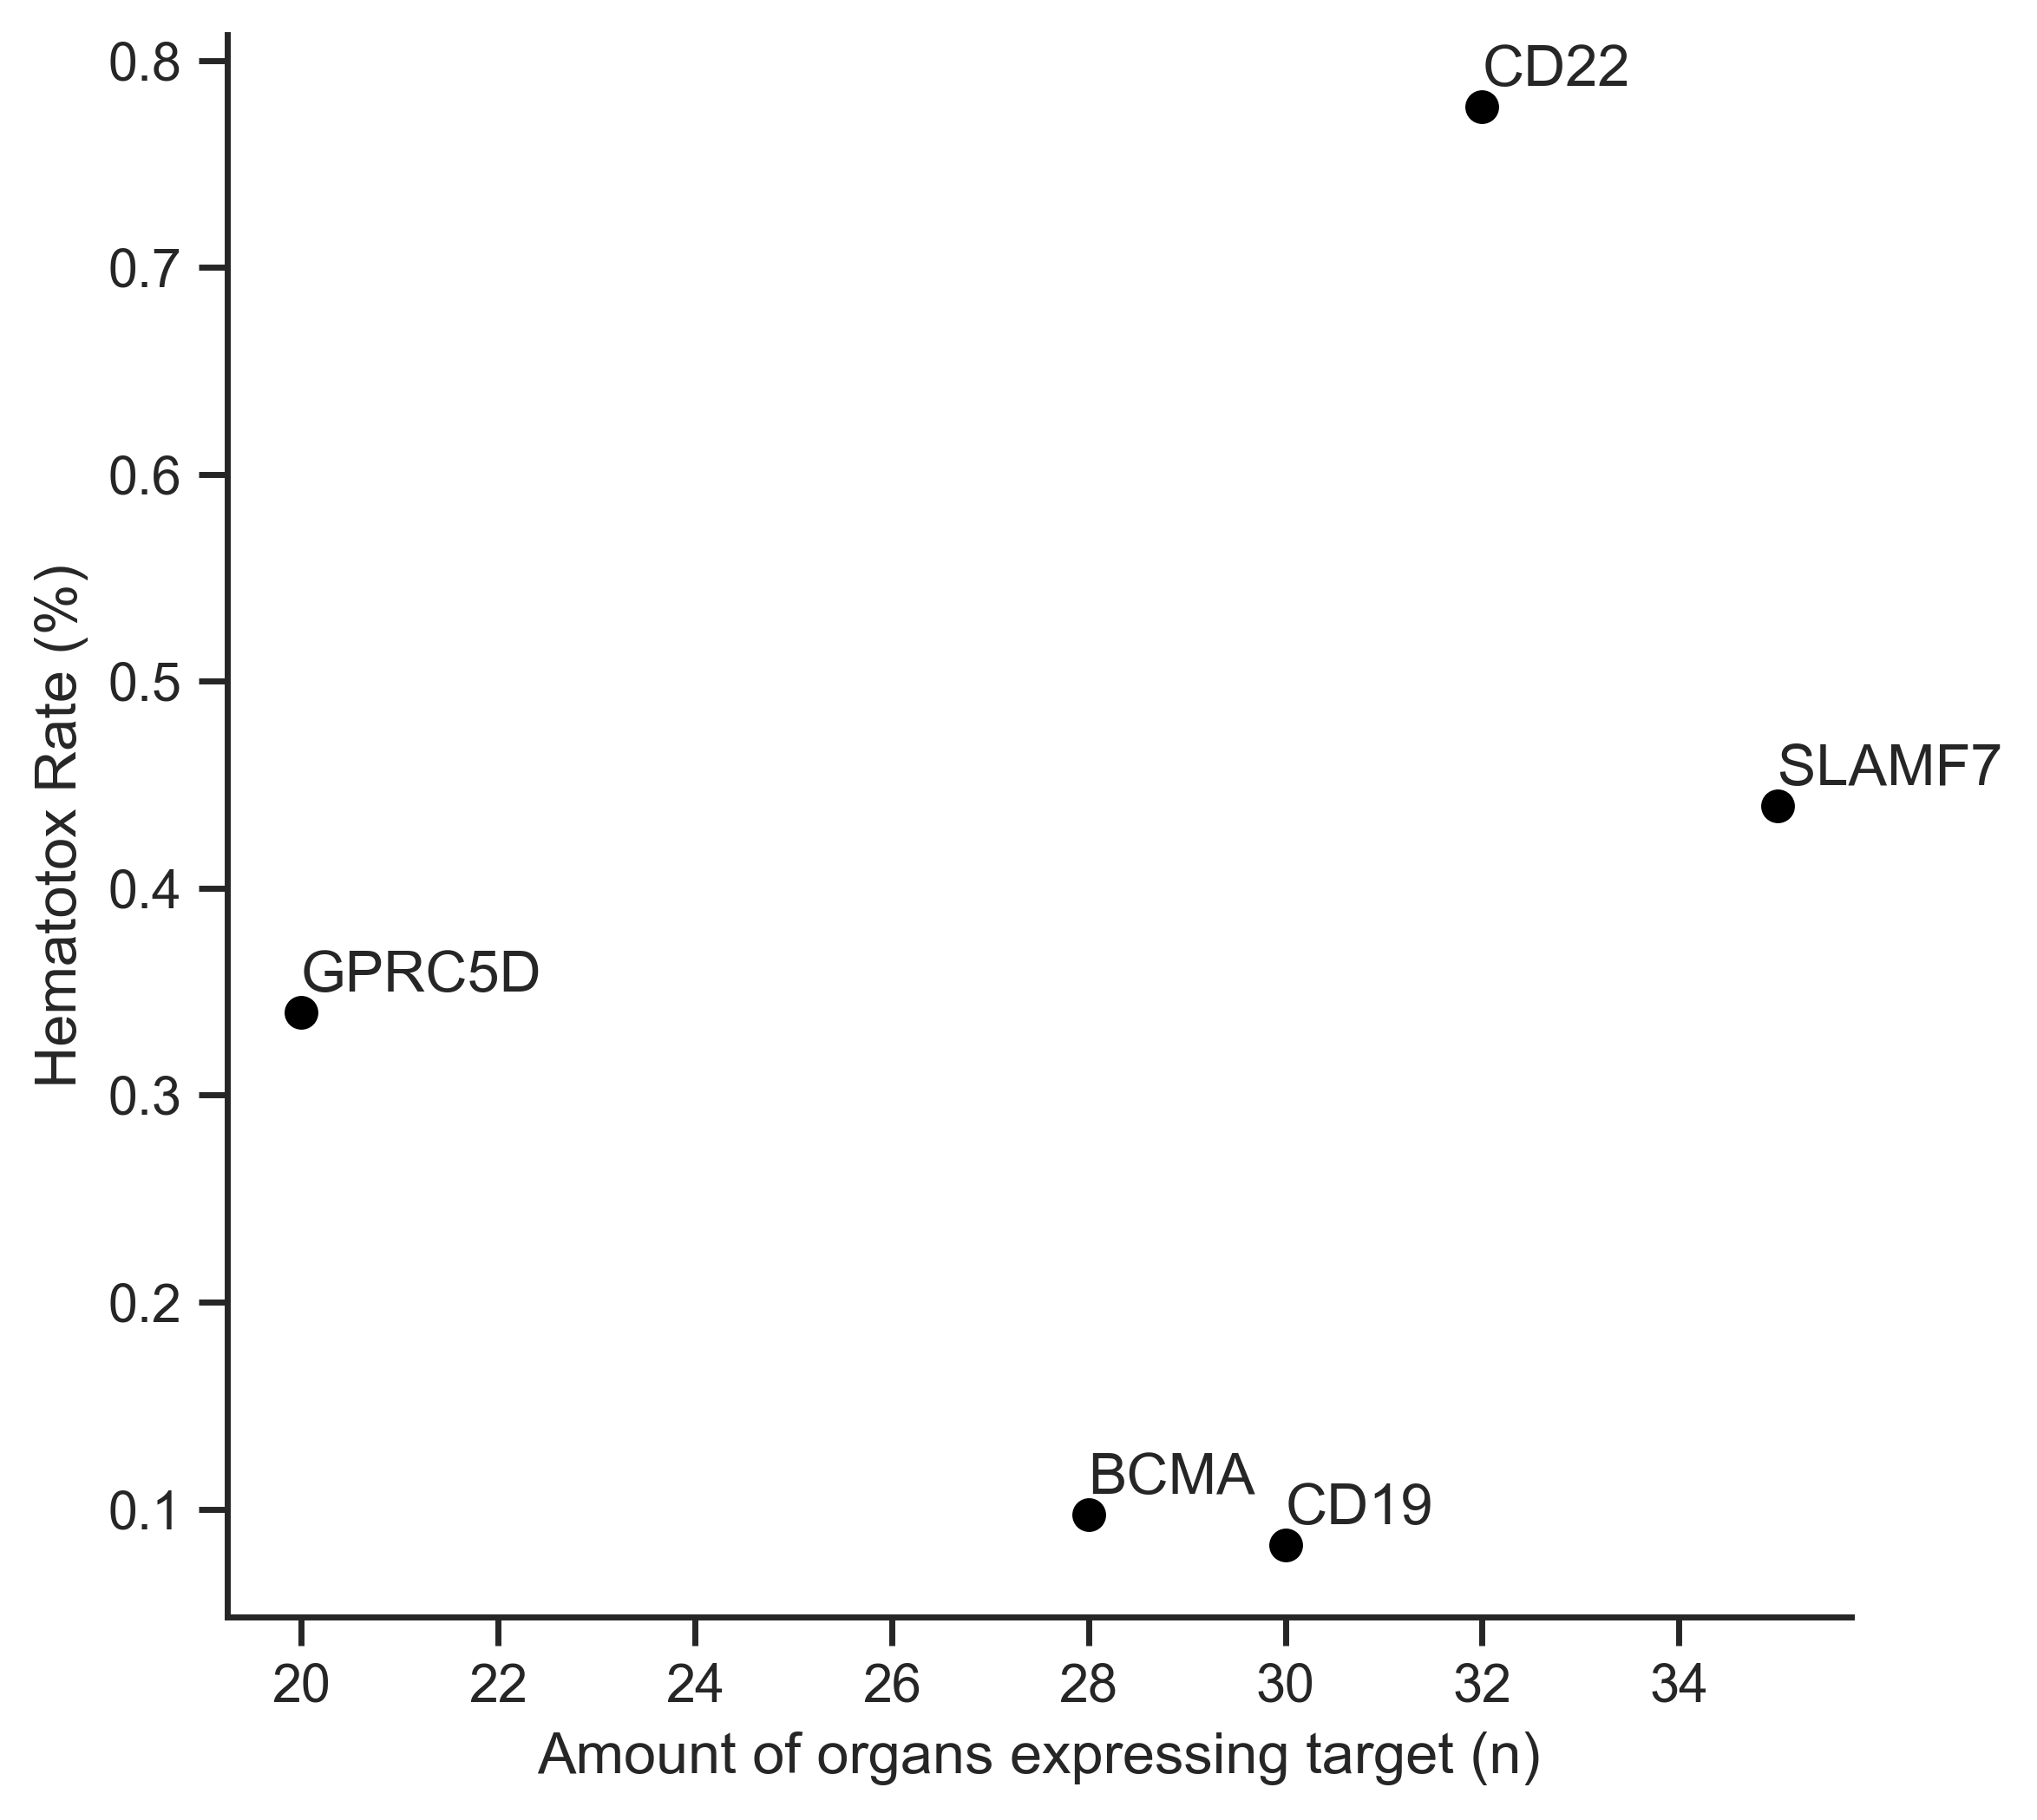

In [39]:
fig, ax = plt.subplots()
ax.scatter(df_plot['n_organs'],df_plot['Hematotox Rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['n_organs'][i]+0, df_plot['Hematotox Rate'][i]+0.01))

    
plt.ylabel('Hematotox Rate (%)', size = 12)
plt.xlabel('Amount of organs expressing target (n)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [42]:
expr=df_plot['n_organs']
expr

NCT Number
BCMA      28
CD19      30
CD22      32
GPRC5D    20
SLAMF7    35
Name: n_organs, dtype: int64

In [43]:
rate=df_plot['Hematotox Rate']
rate

NCT Number
BCMA      0.097213
CD19      0.082568
CD22      0.777778
GPRC5D    0.340138
SLAMF7    0.440000
Name: Hematotox Rate, dtype: float64

In [44]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.293472588521068, pvalue=0.6317742762097298)

In [45]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.49999999999999994
0.39100221895577053


## Target-expressing HSPCs (Suppl. Fig. 2 d)

In [50]:
# only HSPC
ix=np.isin(adata.obs['celltype'], 'Hematopoietic stem cells') 
adata_sub=adata[ix].copy()

In [51]:
adata_sub

AnnData object with n_obs × n_vars = 3214 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [67]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [68]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,0.000000,0,TNFRSF17
CD19,0.342253,11,CD19
CD22,0.497822,16,CD22
GPRC5D,0.000000,0,GPRC5D
SLAMF7,0.124456,4,SLAMF7


In [69]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,0.000000,0,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,0.342253,11,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,0.497822,16,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.000000,0,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,0.124456,4,SLAMF7


In [72]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

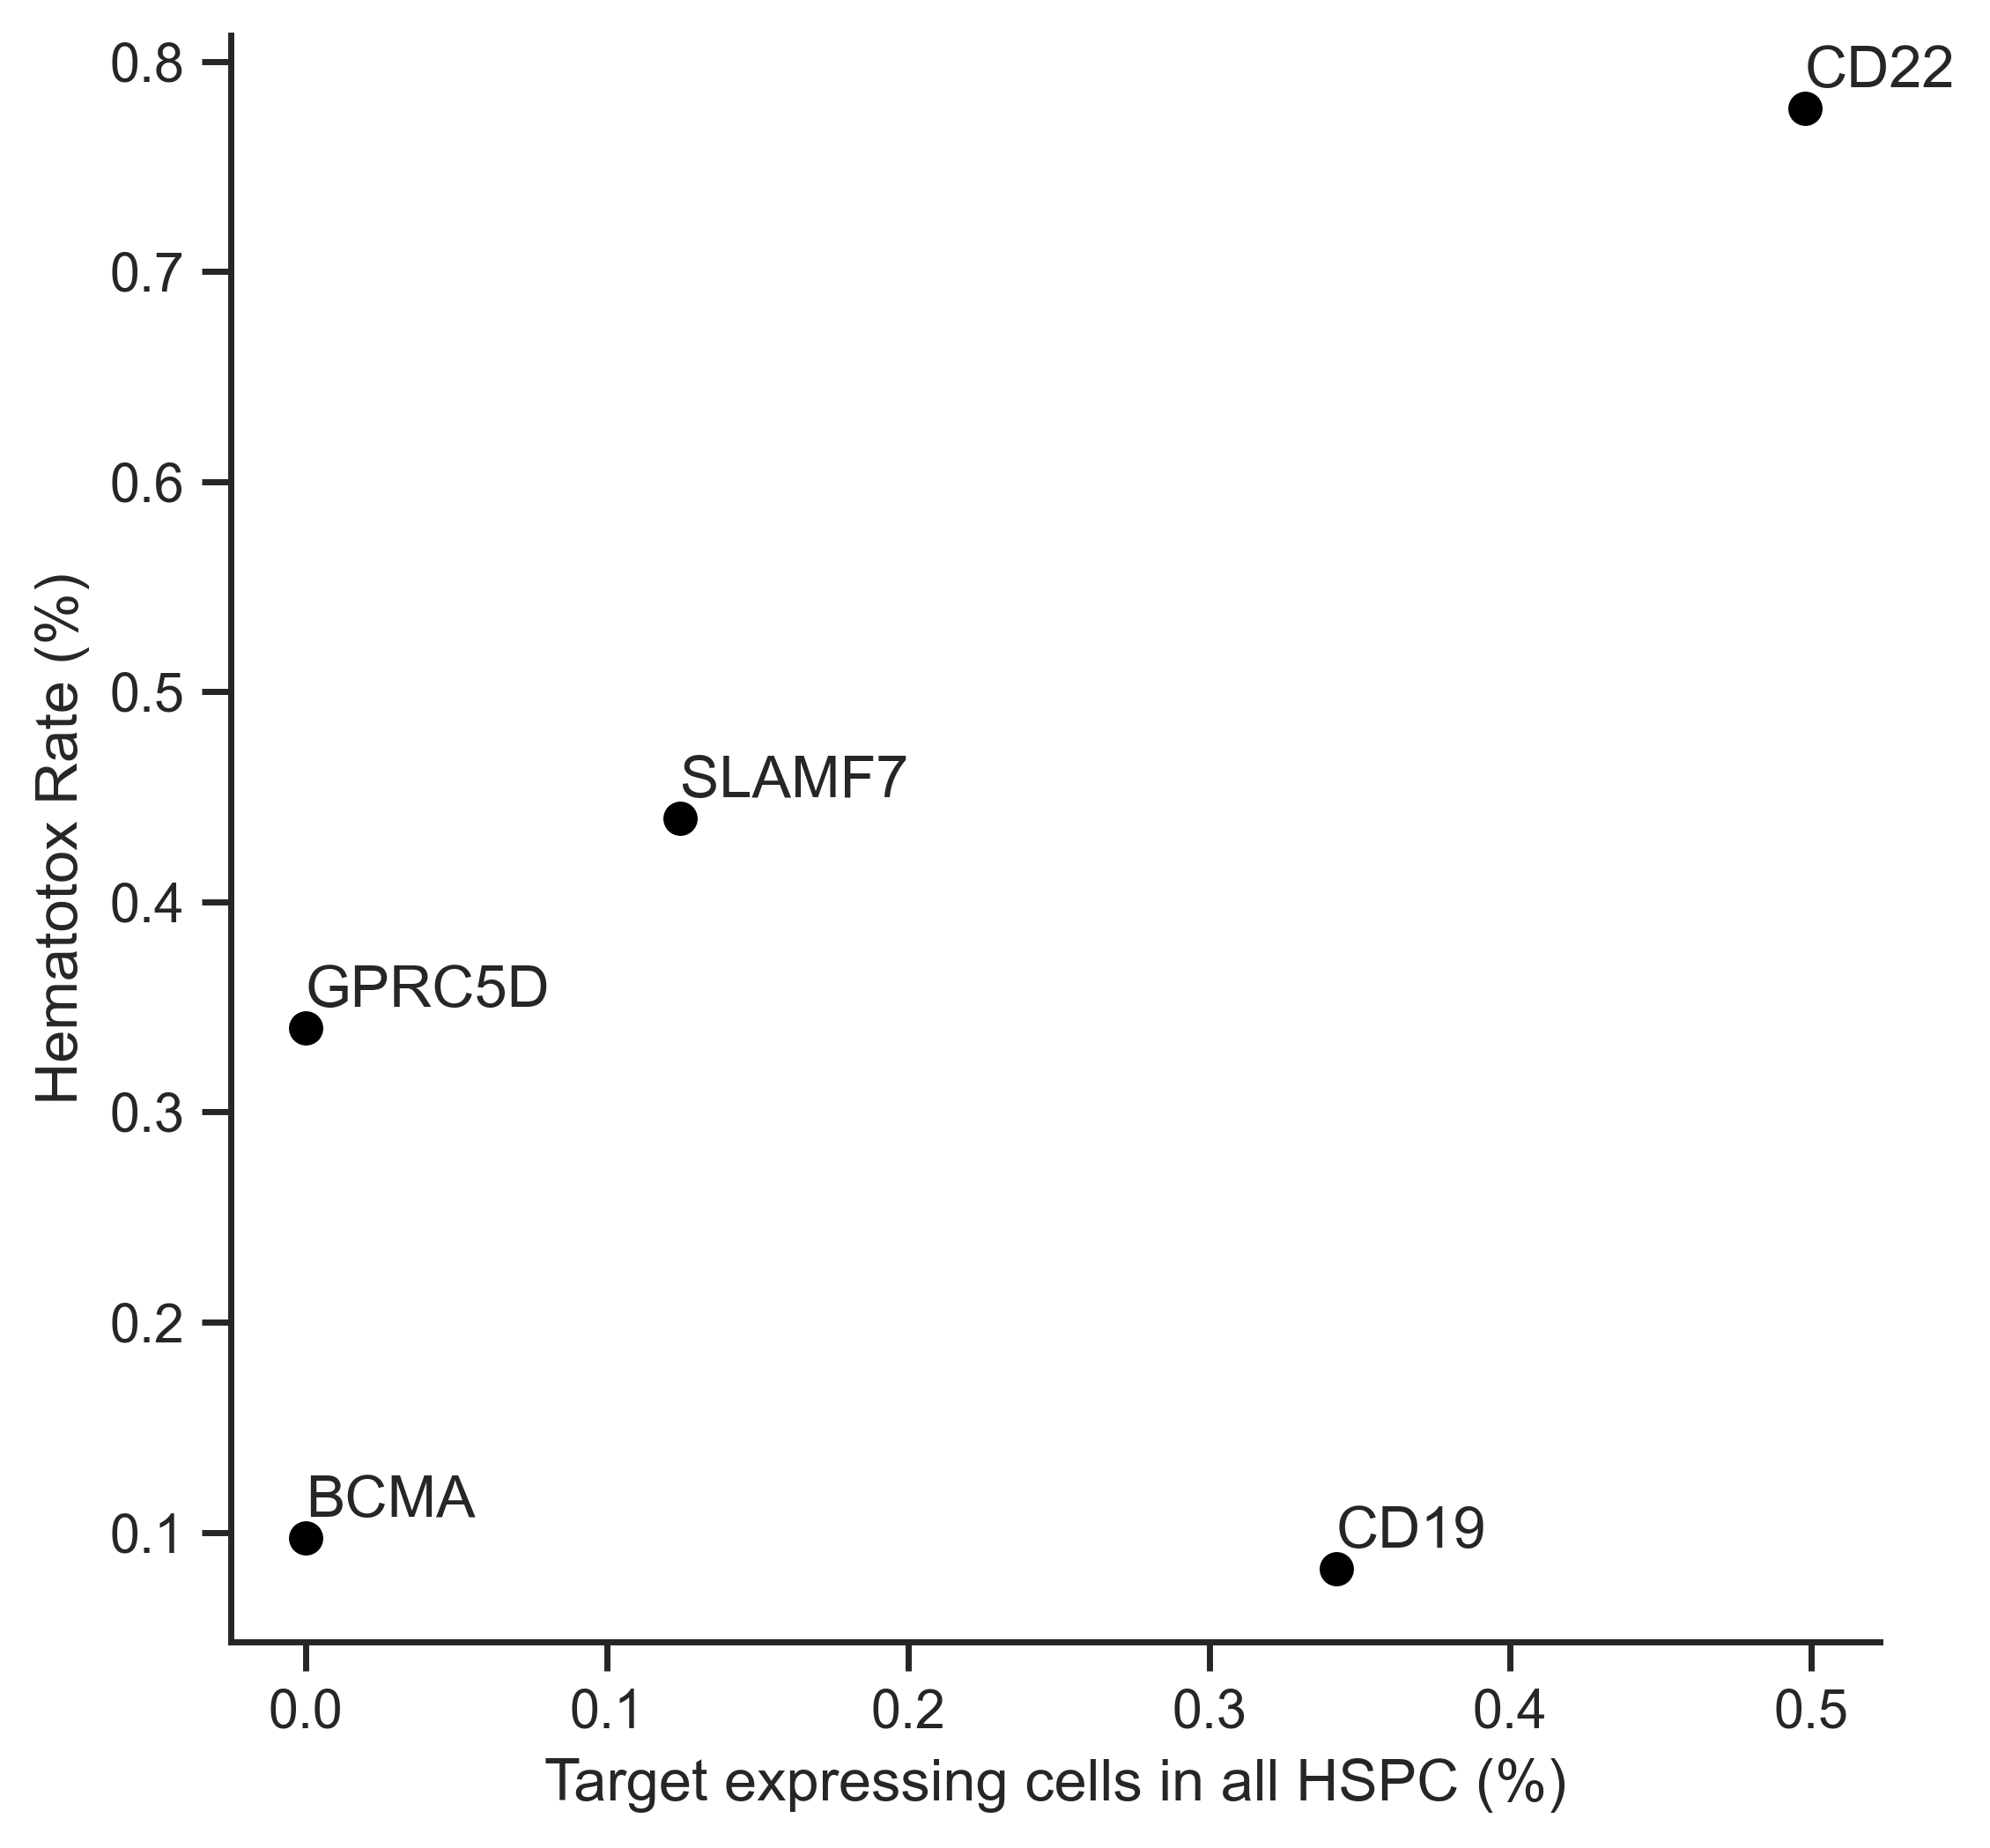

In [74]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Hematotox Rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.0, df_plot['Hematotox Rate'][i]+0.01))

    
plt.ylabel('Hematotox Rate (%)', size = 12)
plt.xlabel('Target expressing cells in all HSPC (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [77]:
expr=df_plot['percentages']
expr

NCT Number
BCMA      0.000000
CD19      0.342253
CD22      0.497822
GPRC5D    0.000000
SLAMF7    0.124456
Name: percentages, dtype: float64

In [78]:
rate=df_plot['Severe CRS rate']
rate

NCT Number
BCMA      0.104891
CD19      0.170124
CD22      0.097549
GPRC5D    0.029412
SLAMF7    0.100000
Name: Severe CRS rate, dtype: float64

In [79]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.509838515437955, pvalue=0.3801895937075357)

In [80]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.15389675281277312
0.8048288166080632


## Target-expressing lymphatic cells in lymph nodes (Suppl. Fig. 2 e)

In [8]:
lymphatic_cells=['B cells','Plasma cells','T cells','NK cells',
                 'Dendritic cells','Macrophages','Lymphatic endothelial cells', 'Mast cells','Neutrophils']

In [86]:
# only lymphatic cells
ix=np.isin(adata.obs['celltype'], lymphatic_cells) 
adata_sub=adata[ix].copy()

In [88]:
# only organ
ix=np.isin(adata_sub.obs['Organ'], ['LymphNode']) 
adata_sub=adata_sub[ix].copy()

In [89]:
adata_sub

AnnData object with n_obs × n_vars = 191694 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [106]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [107]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,4.024643,7715,TNFRSF17
CD19,14.639478,28063,CD19
CD22,15.503876,29720,CD22
GPRC5D,0.397509,762,GPRC5D
SLAMF7,6.057049,11611,SLAMF7


In [108]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,4.024643,7715,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,14.639478,28063,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,15.503876,29720,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.397509,762,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,6.057049,11611,SLAMF7


In [111]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

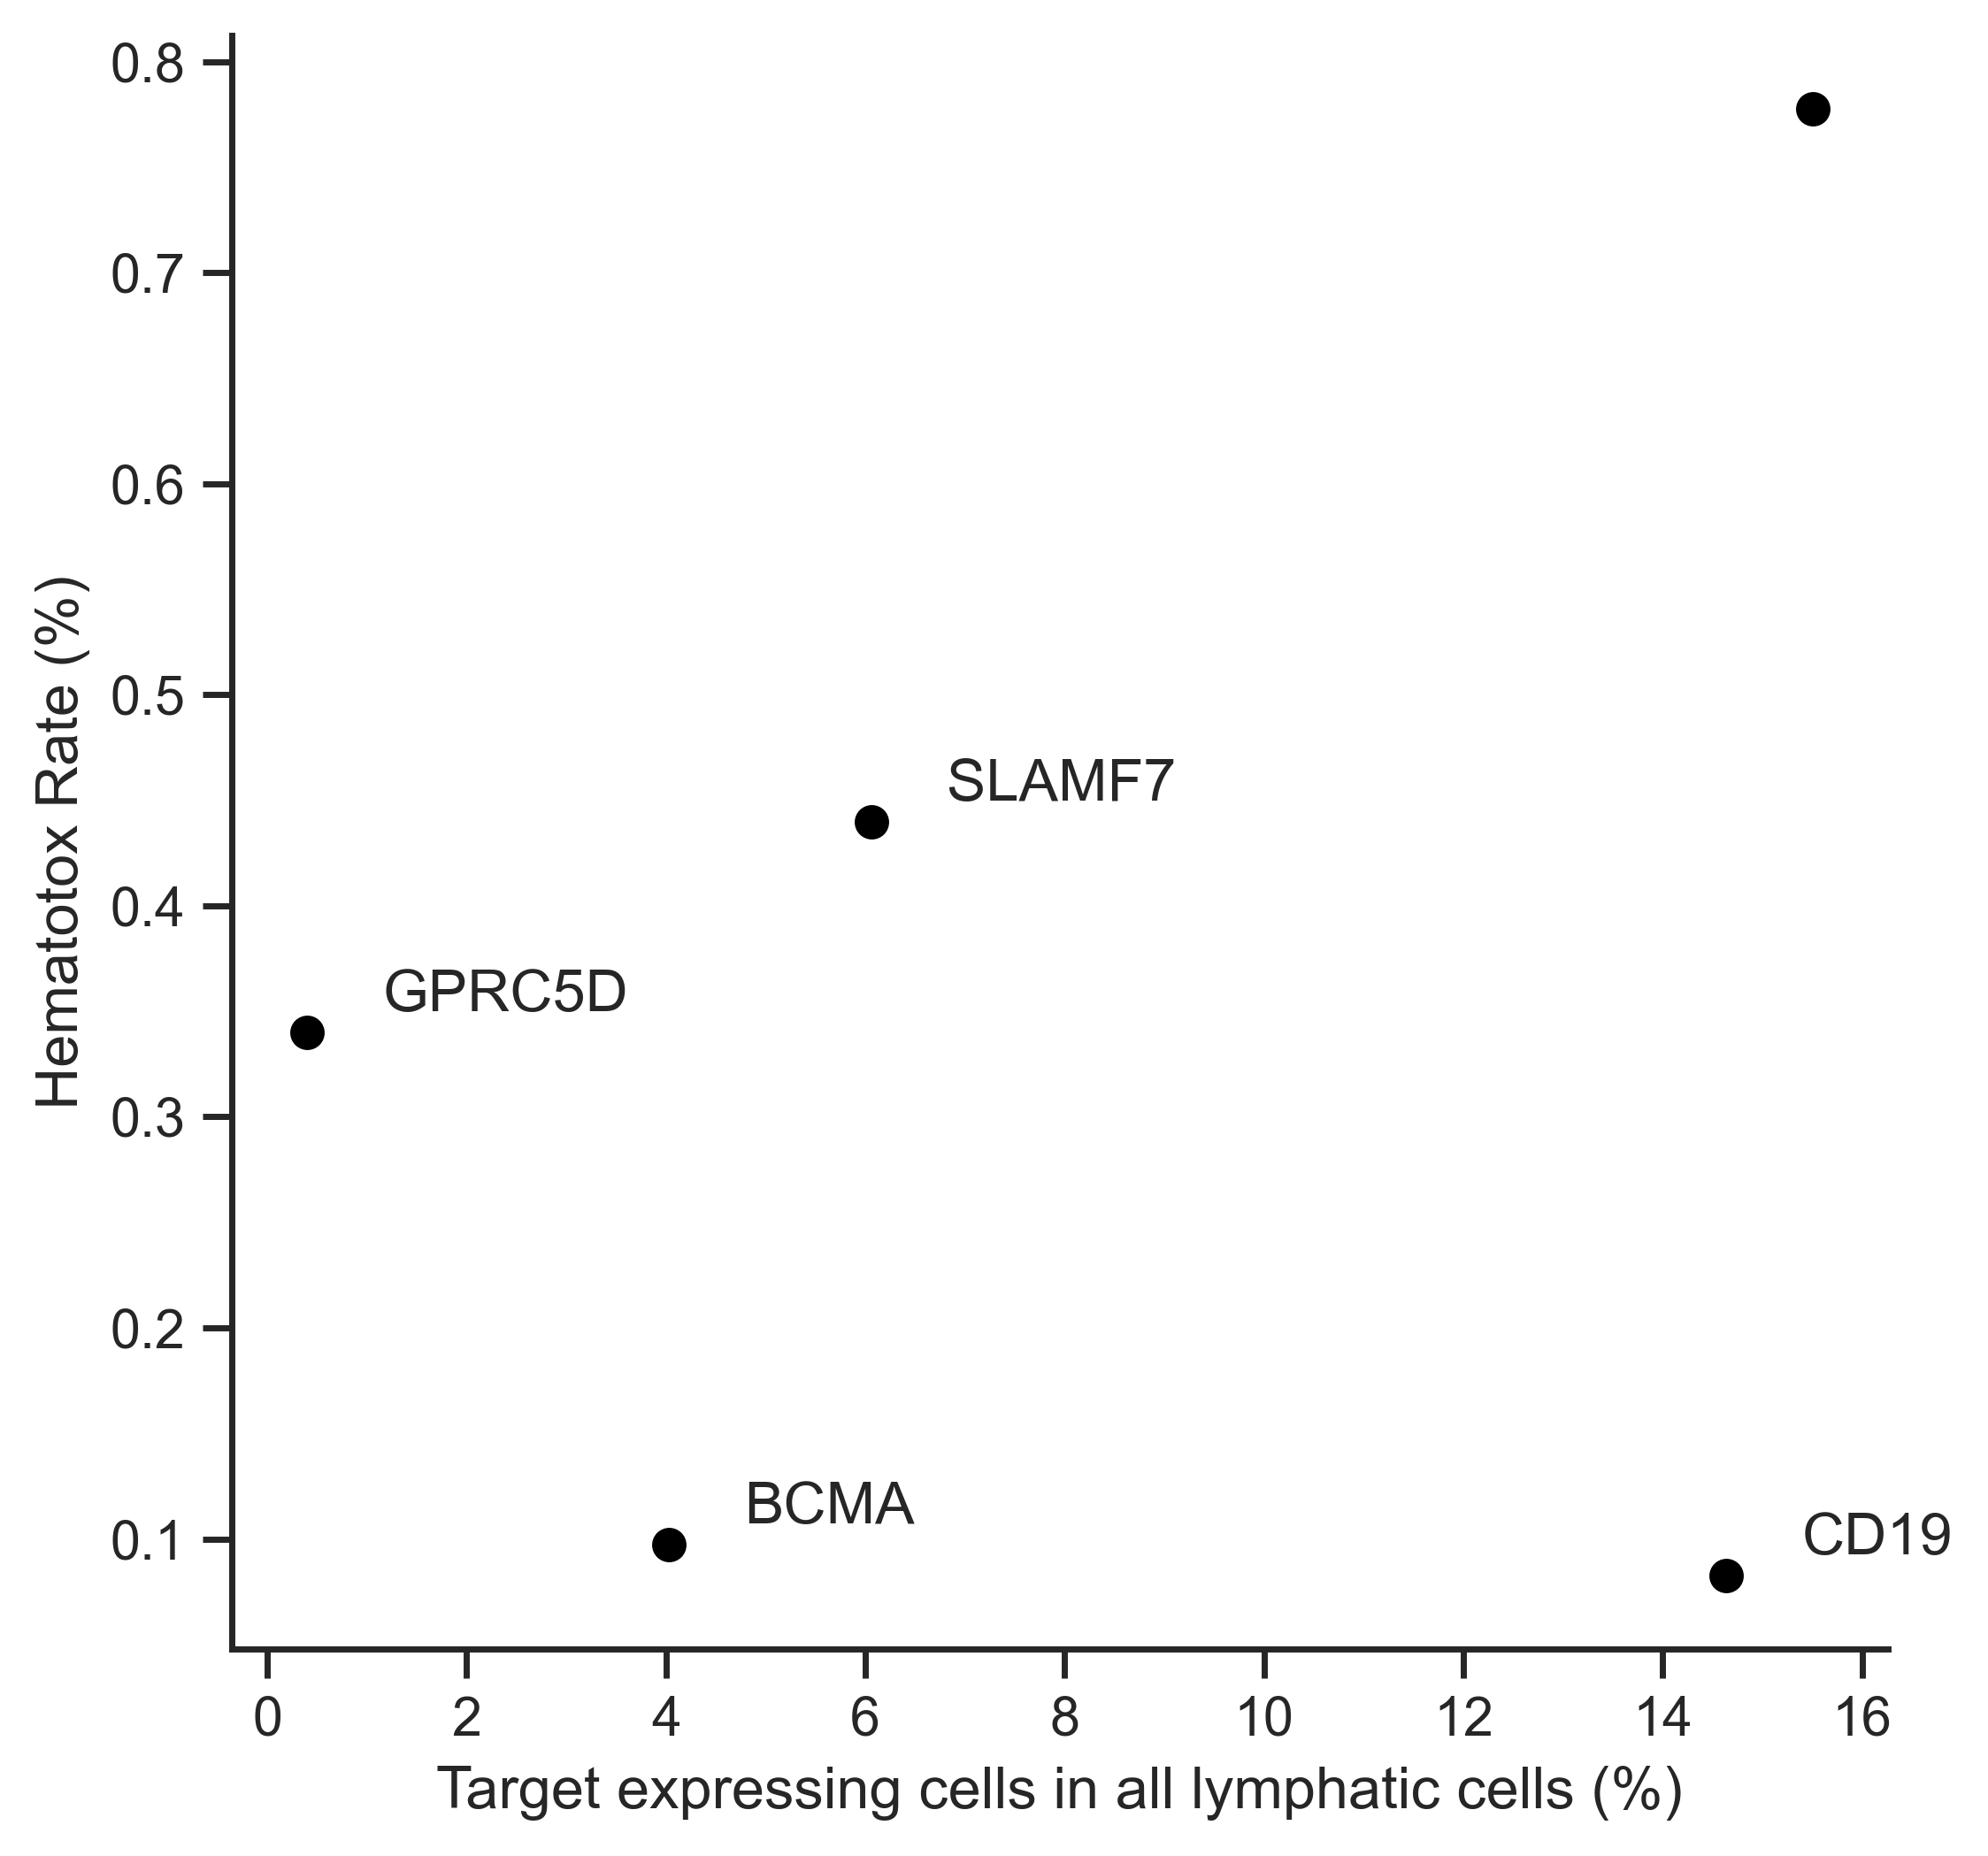

In [113]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Hematotox Rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.76, df_plot['Hematotox Rate'][i]+0.01))

    
plt.ylabel('Hematotox Rate (%)', size = 12)
plt.xlabel('Target expressing cells in all lymphatic cells (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [116]:
expr=df_plot['percentages']
expr

NCT Number
BCMA       4.024643
CD19      14.639478
CD22      15.503876
GPRC5D     0.397509
SLAMF7     6.057049
Name: percentages, dtype: float64

In [117]:
rate=df_plot['Hematotox Rate']
rate

NCT Number
BCMA      0.097213
CD19      0.082568
CD22      0.777778
GPRC5D    0.340138
SLAMF7    0.440000
Name: Hematotox Rate, dtype: float64

In [118]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.3073002230278675, pvalue=0.6149816291532316)

In [119]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.3
0.6238376647810728


## Target-expressing lymphatic cells in bone marrow (Suppl. Fig. 2 e)

In [120]:
lymphatic_cells=['B cells','Plasma cells','T cells','NK cells',
                 'Dendritic cells','Macrophages','Lymphatic endothelial cells', 'Mast cells','Neutrophils']

In [123]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [125]:
# only lymphatic cells
ix=np.isin(adata.obs['celltype'], lymphatic_cells) 
adata_sub=adata[ix].copy()

In [127]:
# only organ
ix=np.isin(adata_sub.obs['Organ'], ['BoneMarrow']) 
adata_sub=adata_sub[ix].copy()

In [128]:
adata_sub

AnnData object with n_obs × n_vars = 52604 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [145]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [146]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,2.324918,1223,TNFRSF17
CD19,2.739335,1441,CD19
CD22,2.461790,1295,CD22
GPRC5D,0.262337,138,GPRC5D
SLAMF7,15.392366,8097,SLAMF7


In [147]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,2.324918,1223,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,2.739335,1441,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,2.461790,1295,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.262337,138,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,15.392366,8097,SLAMF7


In [150]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

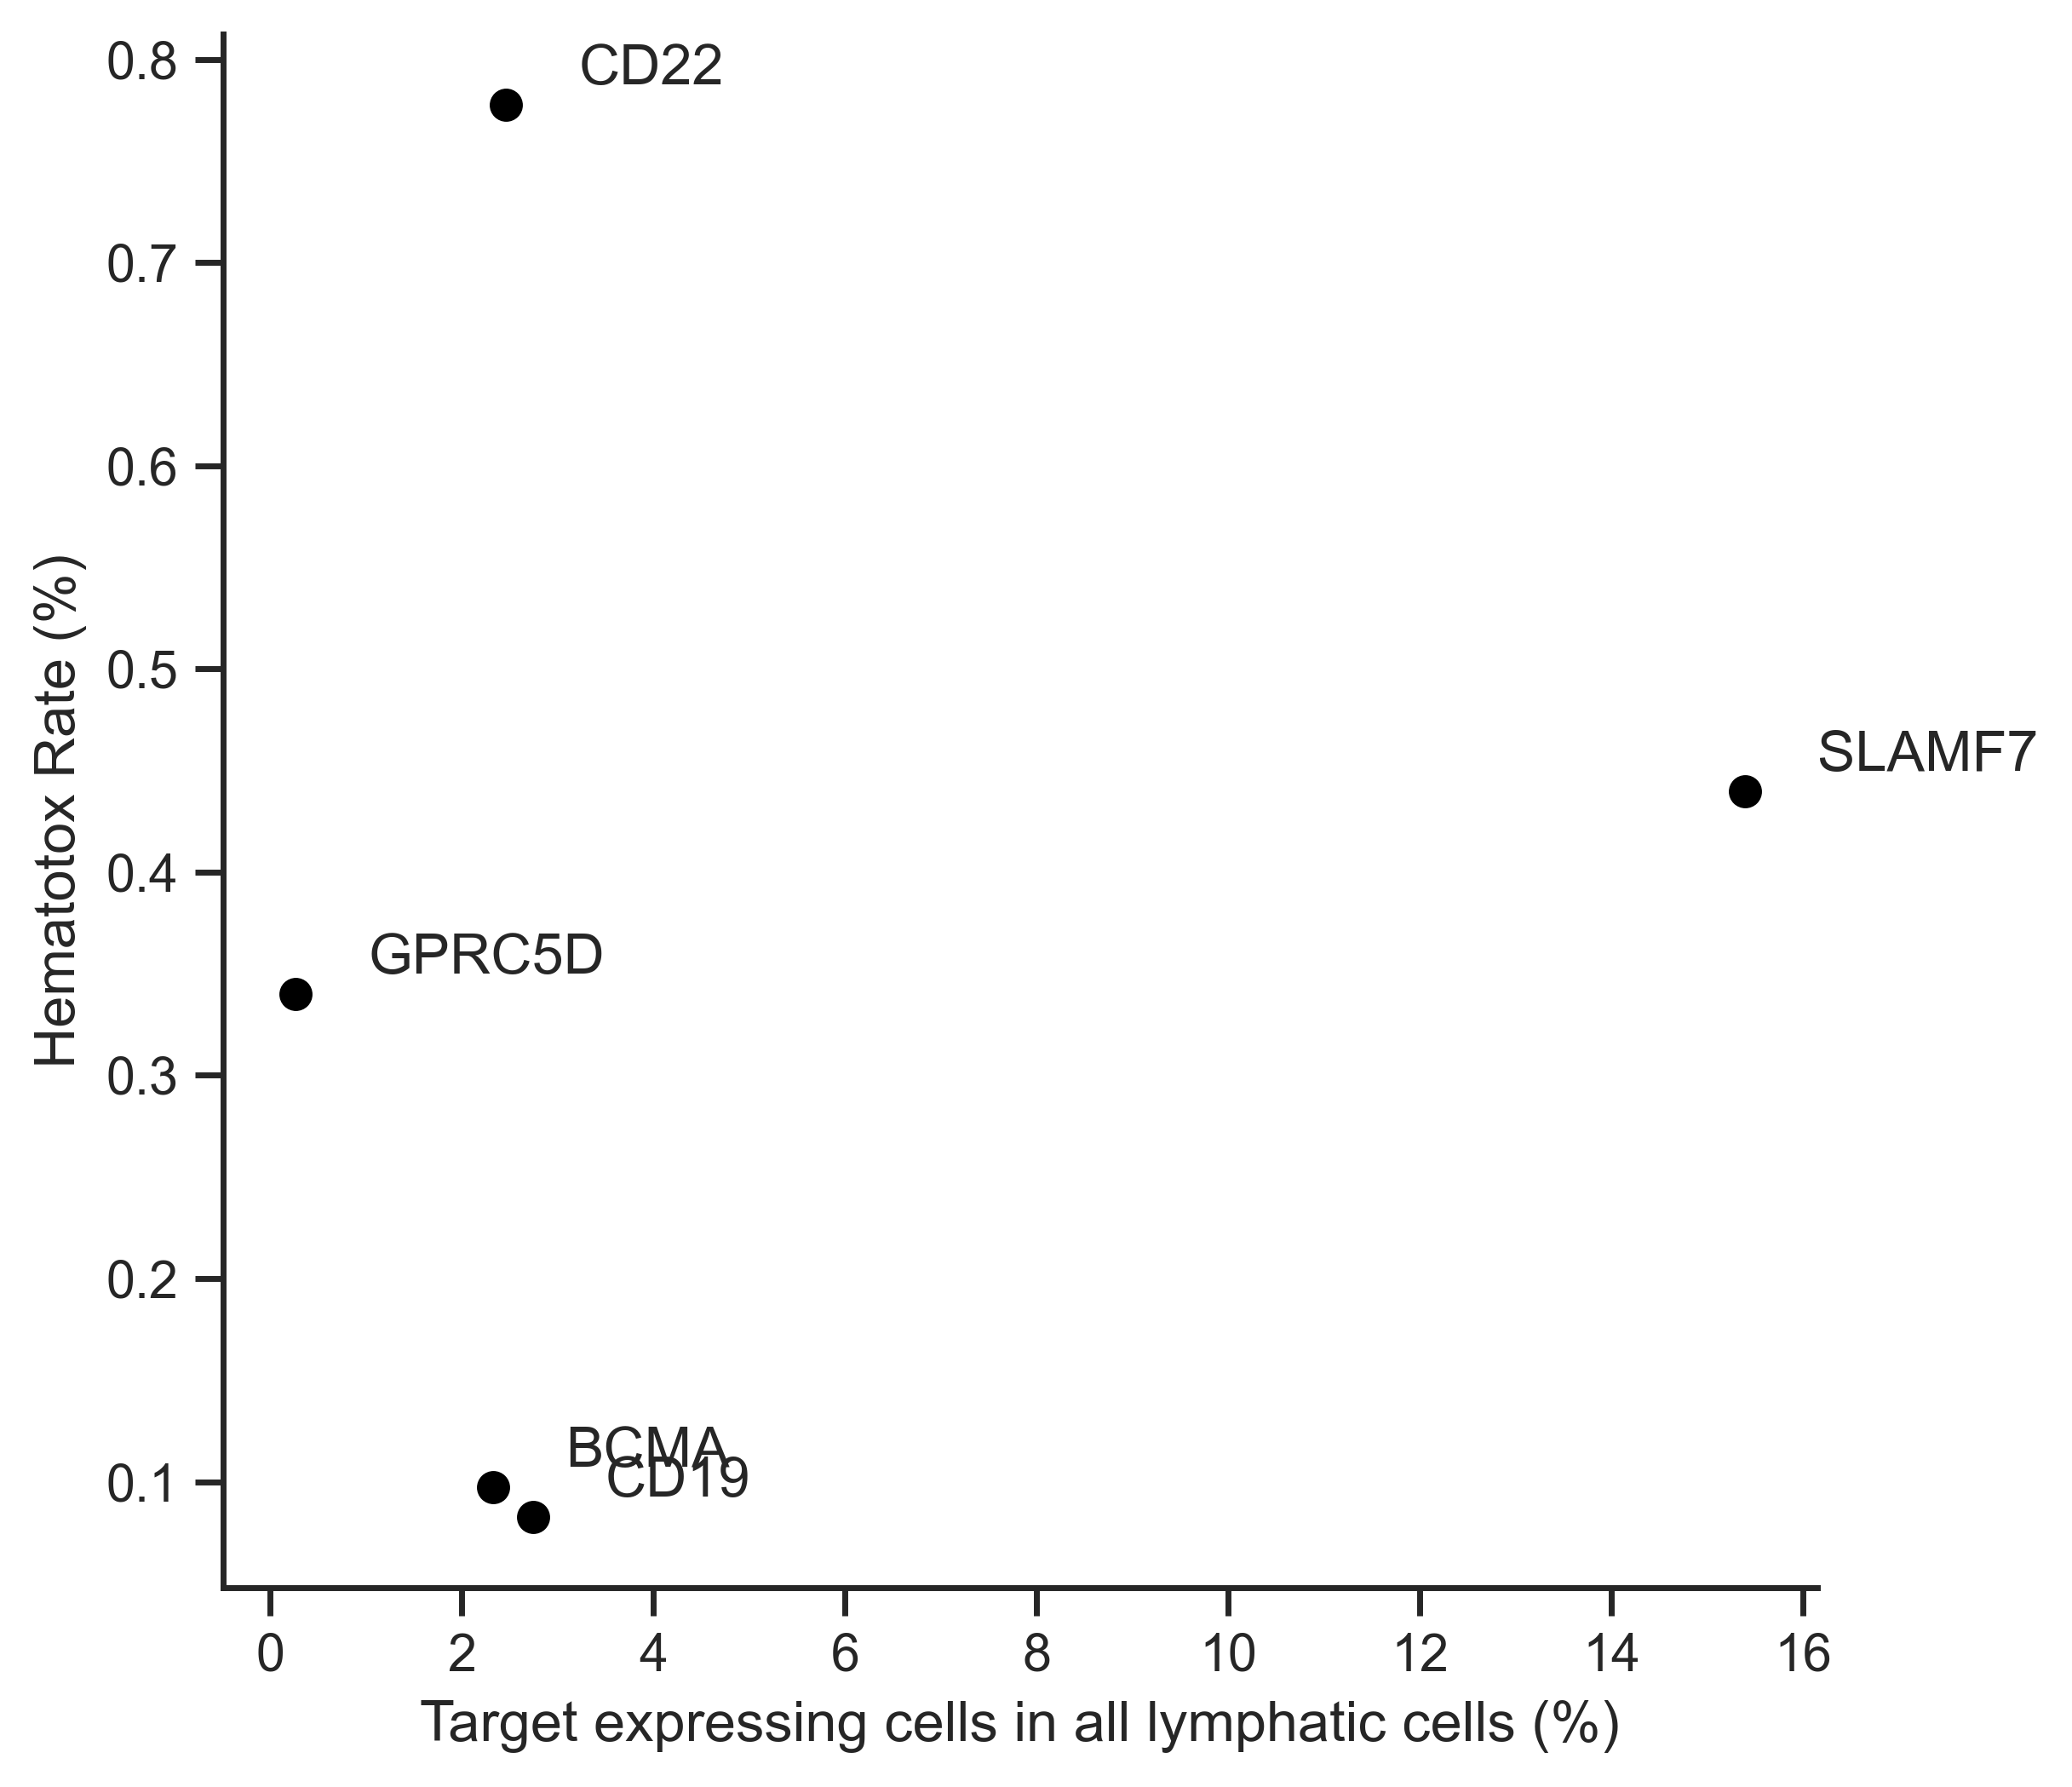

In [152]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Hematotox Rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.76, df_plot['Hematotox Rate'][i]+0.01))

    
plt.ylabel('Hematotox Rate (%)', size = 12)
plt.xlabel('Target expressing cells in all lymphatic cells (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [155]:
expr=df_plot['percentages']
expr

NCT Number
BCMA       2.324918
CD19       2.739335
CD22       2.461790
GPRC5D     0.262337
SLAMF7    15.392366
Name: percentages, dtype: float64

In [156]:
rate=df_plot['Hematotox Rate']
rate

NCT Number
BCMA      0.097213
CD19      0.082568
CD22      0.777778
GPRC5D    0.340138
SLAMF7    0.440000
Name: Hematotox Rate, dtype: float64

In [157]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.16837878121592684, pvalue=0.7866308564484167)

In [158]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.09999999999999999
0.8728885715695383


## Target-expressing B cells in lymph nodes (Suppl. Fig. 2 f)

In [161]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [164]:
# only organ
ix=np.isin(adata.obs['Organ'], ['LymphNode']) 
adata_sub=adata[ix].copy()

In [169]:
# only B cells
ix=np.isin(adata_sub.obs['celltype'], 'B cells') 
adata_sub=adata_sub[ix].copy()

In [170]:
adata_sub

AnnData object with n_obs × n_vars = 50218 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [184]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [185]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,7.987176,4011,TNFRSF17
CD19,50.832371,25527,CD19
CD22,55.259070,27750,CD22
GPRC5D,0.177227,89,GPRC5D
SLAMF7,4.042375,2030,SLAMF7


In [186]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,7.987176,4011,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,50.832371,25527,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,55.259070,27750,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.177227,89,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,4.042375,2030,SLAMF7


In [189]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

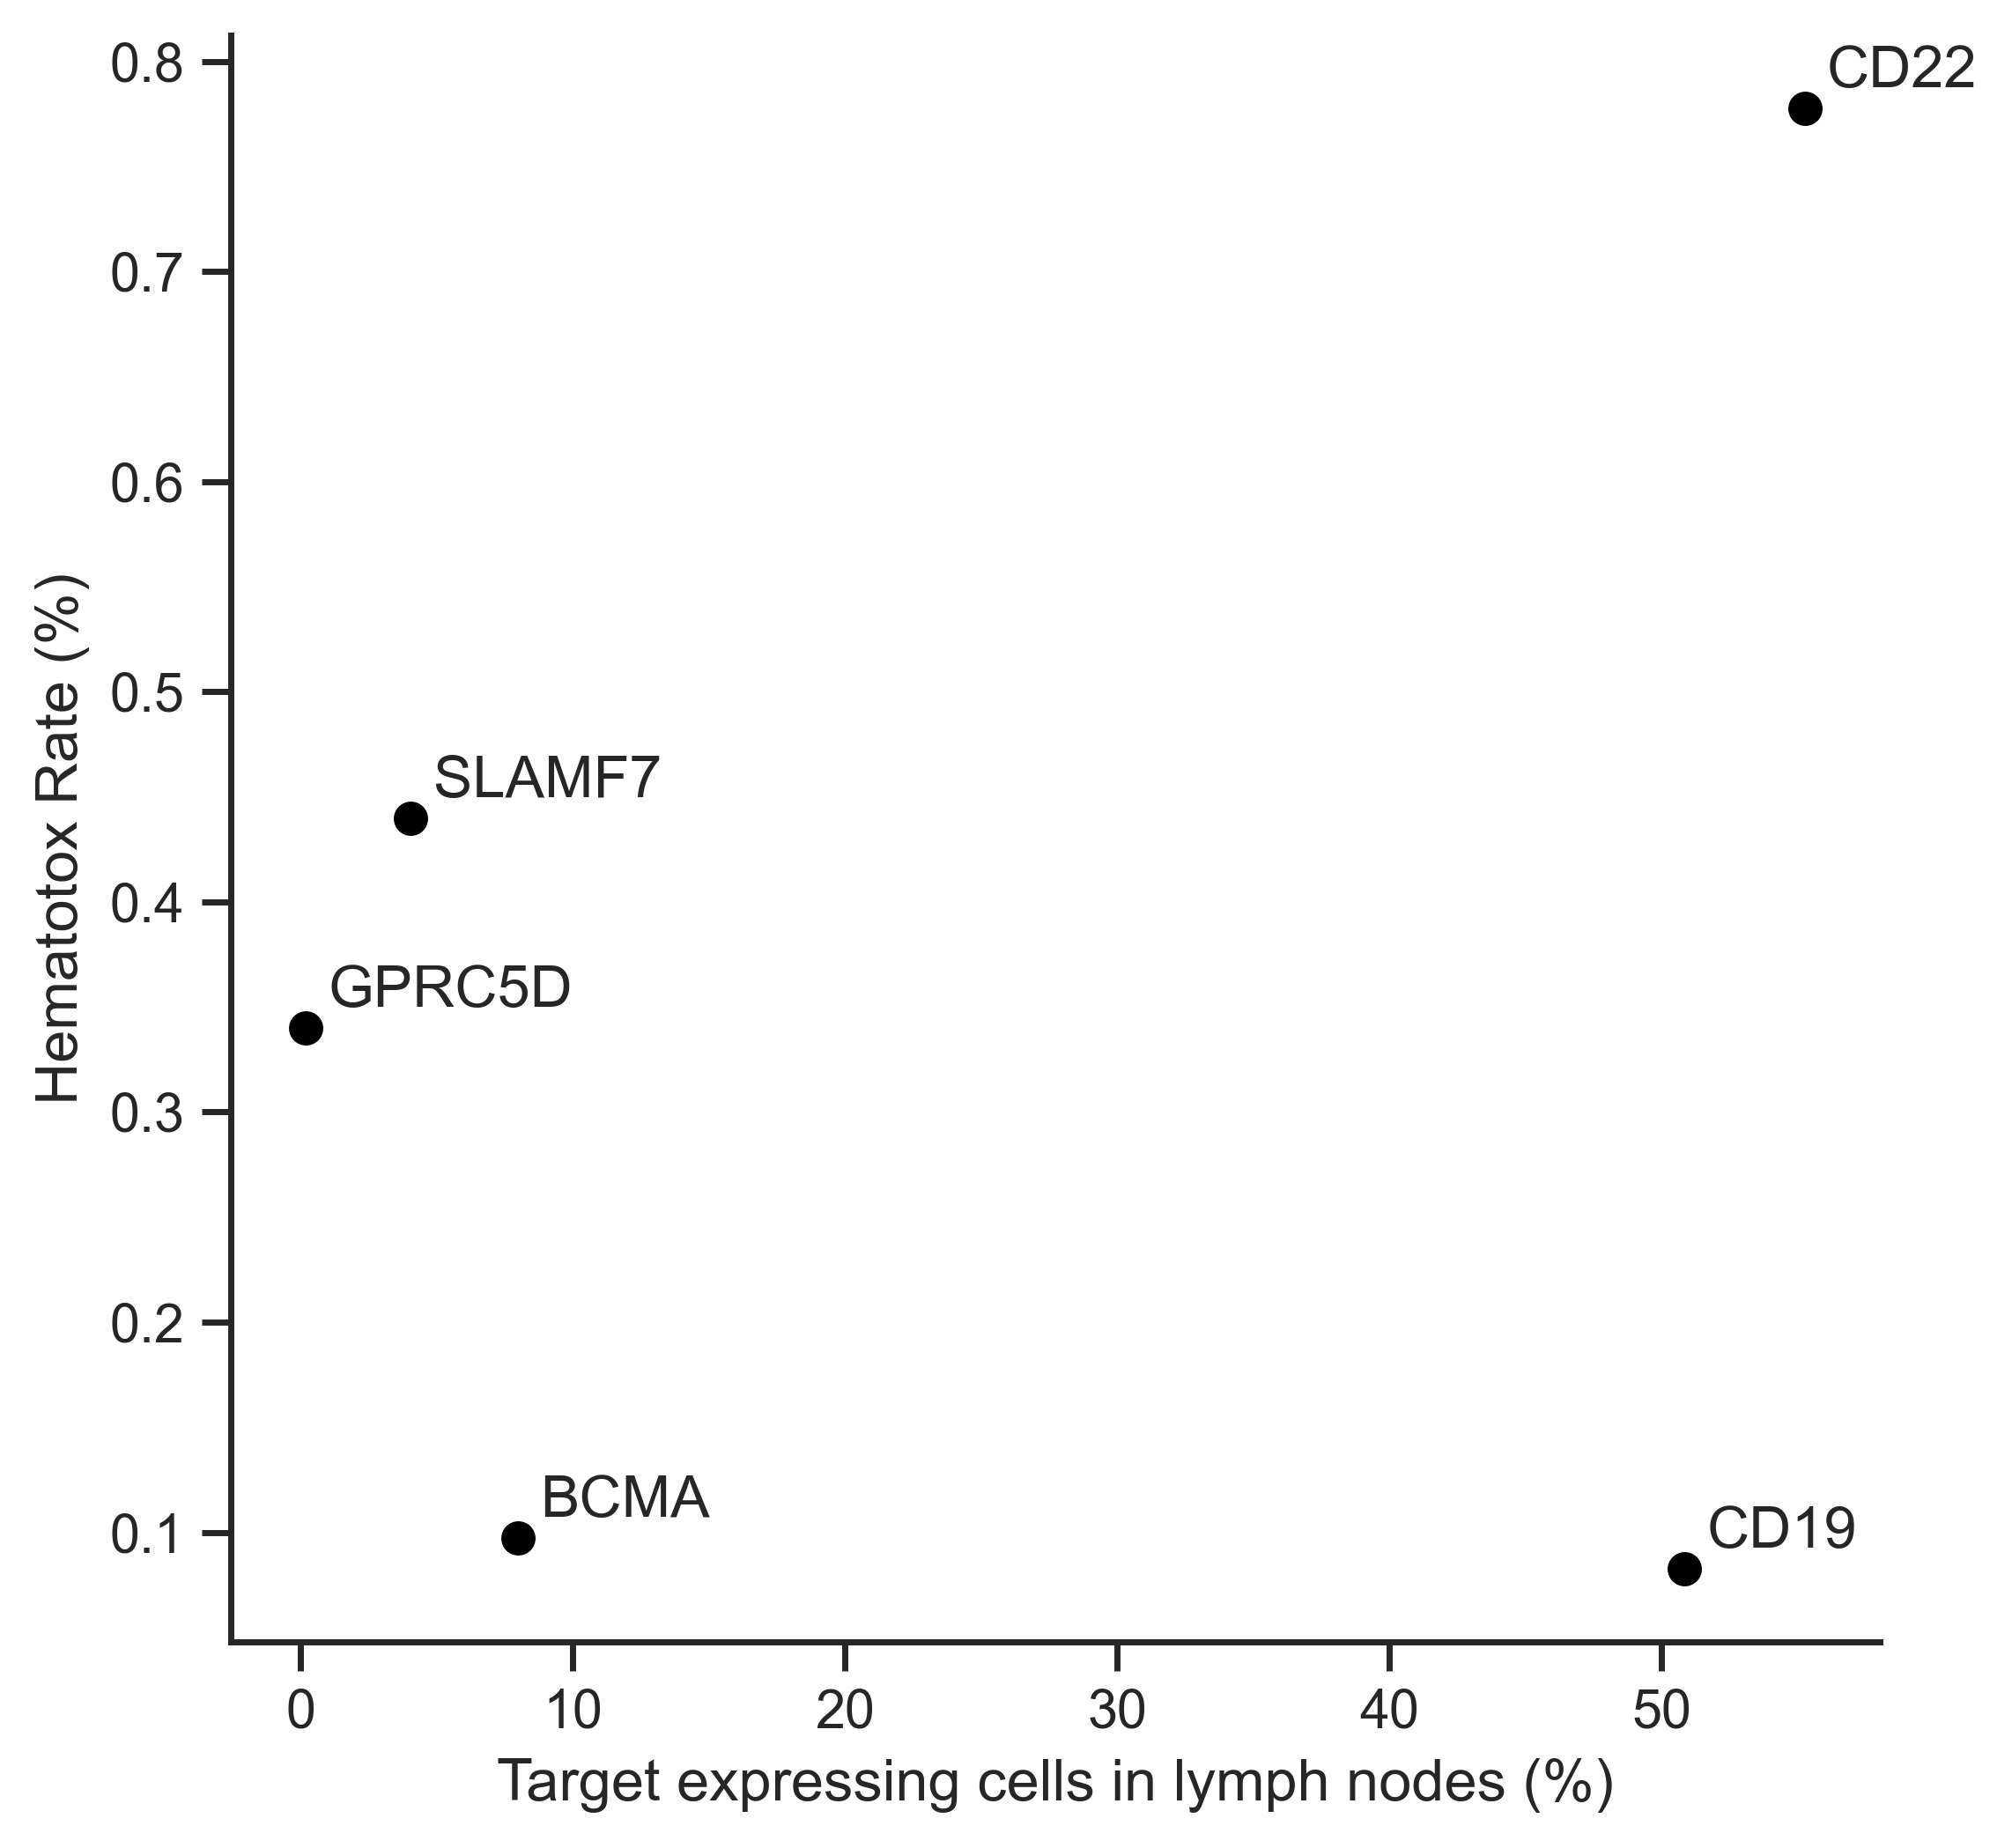

In [191]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Hematotox Rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.82, df_plot['Hematotox Rate'][i]+0.01))

    
plt.ylabel('Hematotox Rate (%)', size = 12)
plt.xlabel('Target expressing cells in lymph nodes (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [194]:
expr=df_plot['percentages']
expr

NCT Number
BCMA       7.987176
CD19      50.832371
CD22      55.259070
GPRC5D     0.177227
SLAMF7     4.042375
Name: percentages, dtype: float64

In [195]:
rate=df_plot['Severe CRS rate']
rate

NCT Number
BCMA      0.104891
CD19      0.170124
CD22      0.097549
GPRC5D    0.029412
SLAMF7    0.100000
Name: Severe CRS rate, dtype: float64

In [196]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.6332312993830754, pvalue=0.25145071108418476)

In [197]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.39999999999999997
0.5046315754686911


## Target-expressing B cells in bone marrow (Suppl. Fig. 2 f)

In [201]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [203]:
# only organ
ix=np.isin(adata.obs['Organ'], ['BoneMarrow']) 
adata_sub=adata[ix].copy()

In [206]:
# only B cells
ix=np.isin(adata_sub.obs['celltype'], 'B cells') 
adata_sub=adata_sub[ix].copy()

In [207]:
adata_sub

AnnData object with n_obs × n_vars = 2470 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [221]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [222]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,5.506073,136,TNFRSF17
CD19,38.623482,954,CD19
CD22,47.368421,1170,CD22
GPRC5D,0.728745,18,GPRC5D
SLAMF7,3.117409,77,SLAMF7


In [223]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,5.506073,136,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,38.623482,954,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,47.368421,1170,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.728745,18,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,3.117409,77,SLAMF7


In [226]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

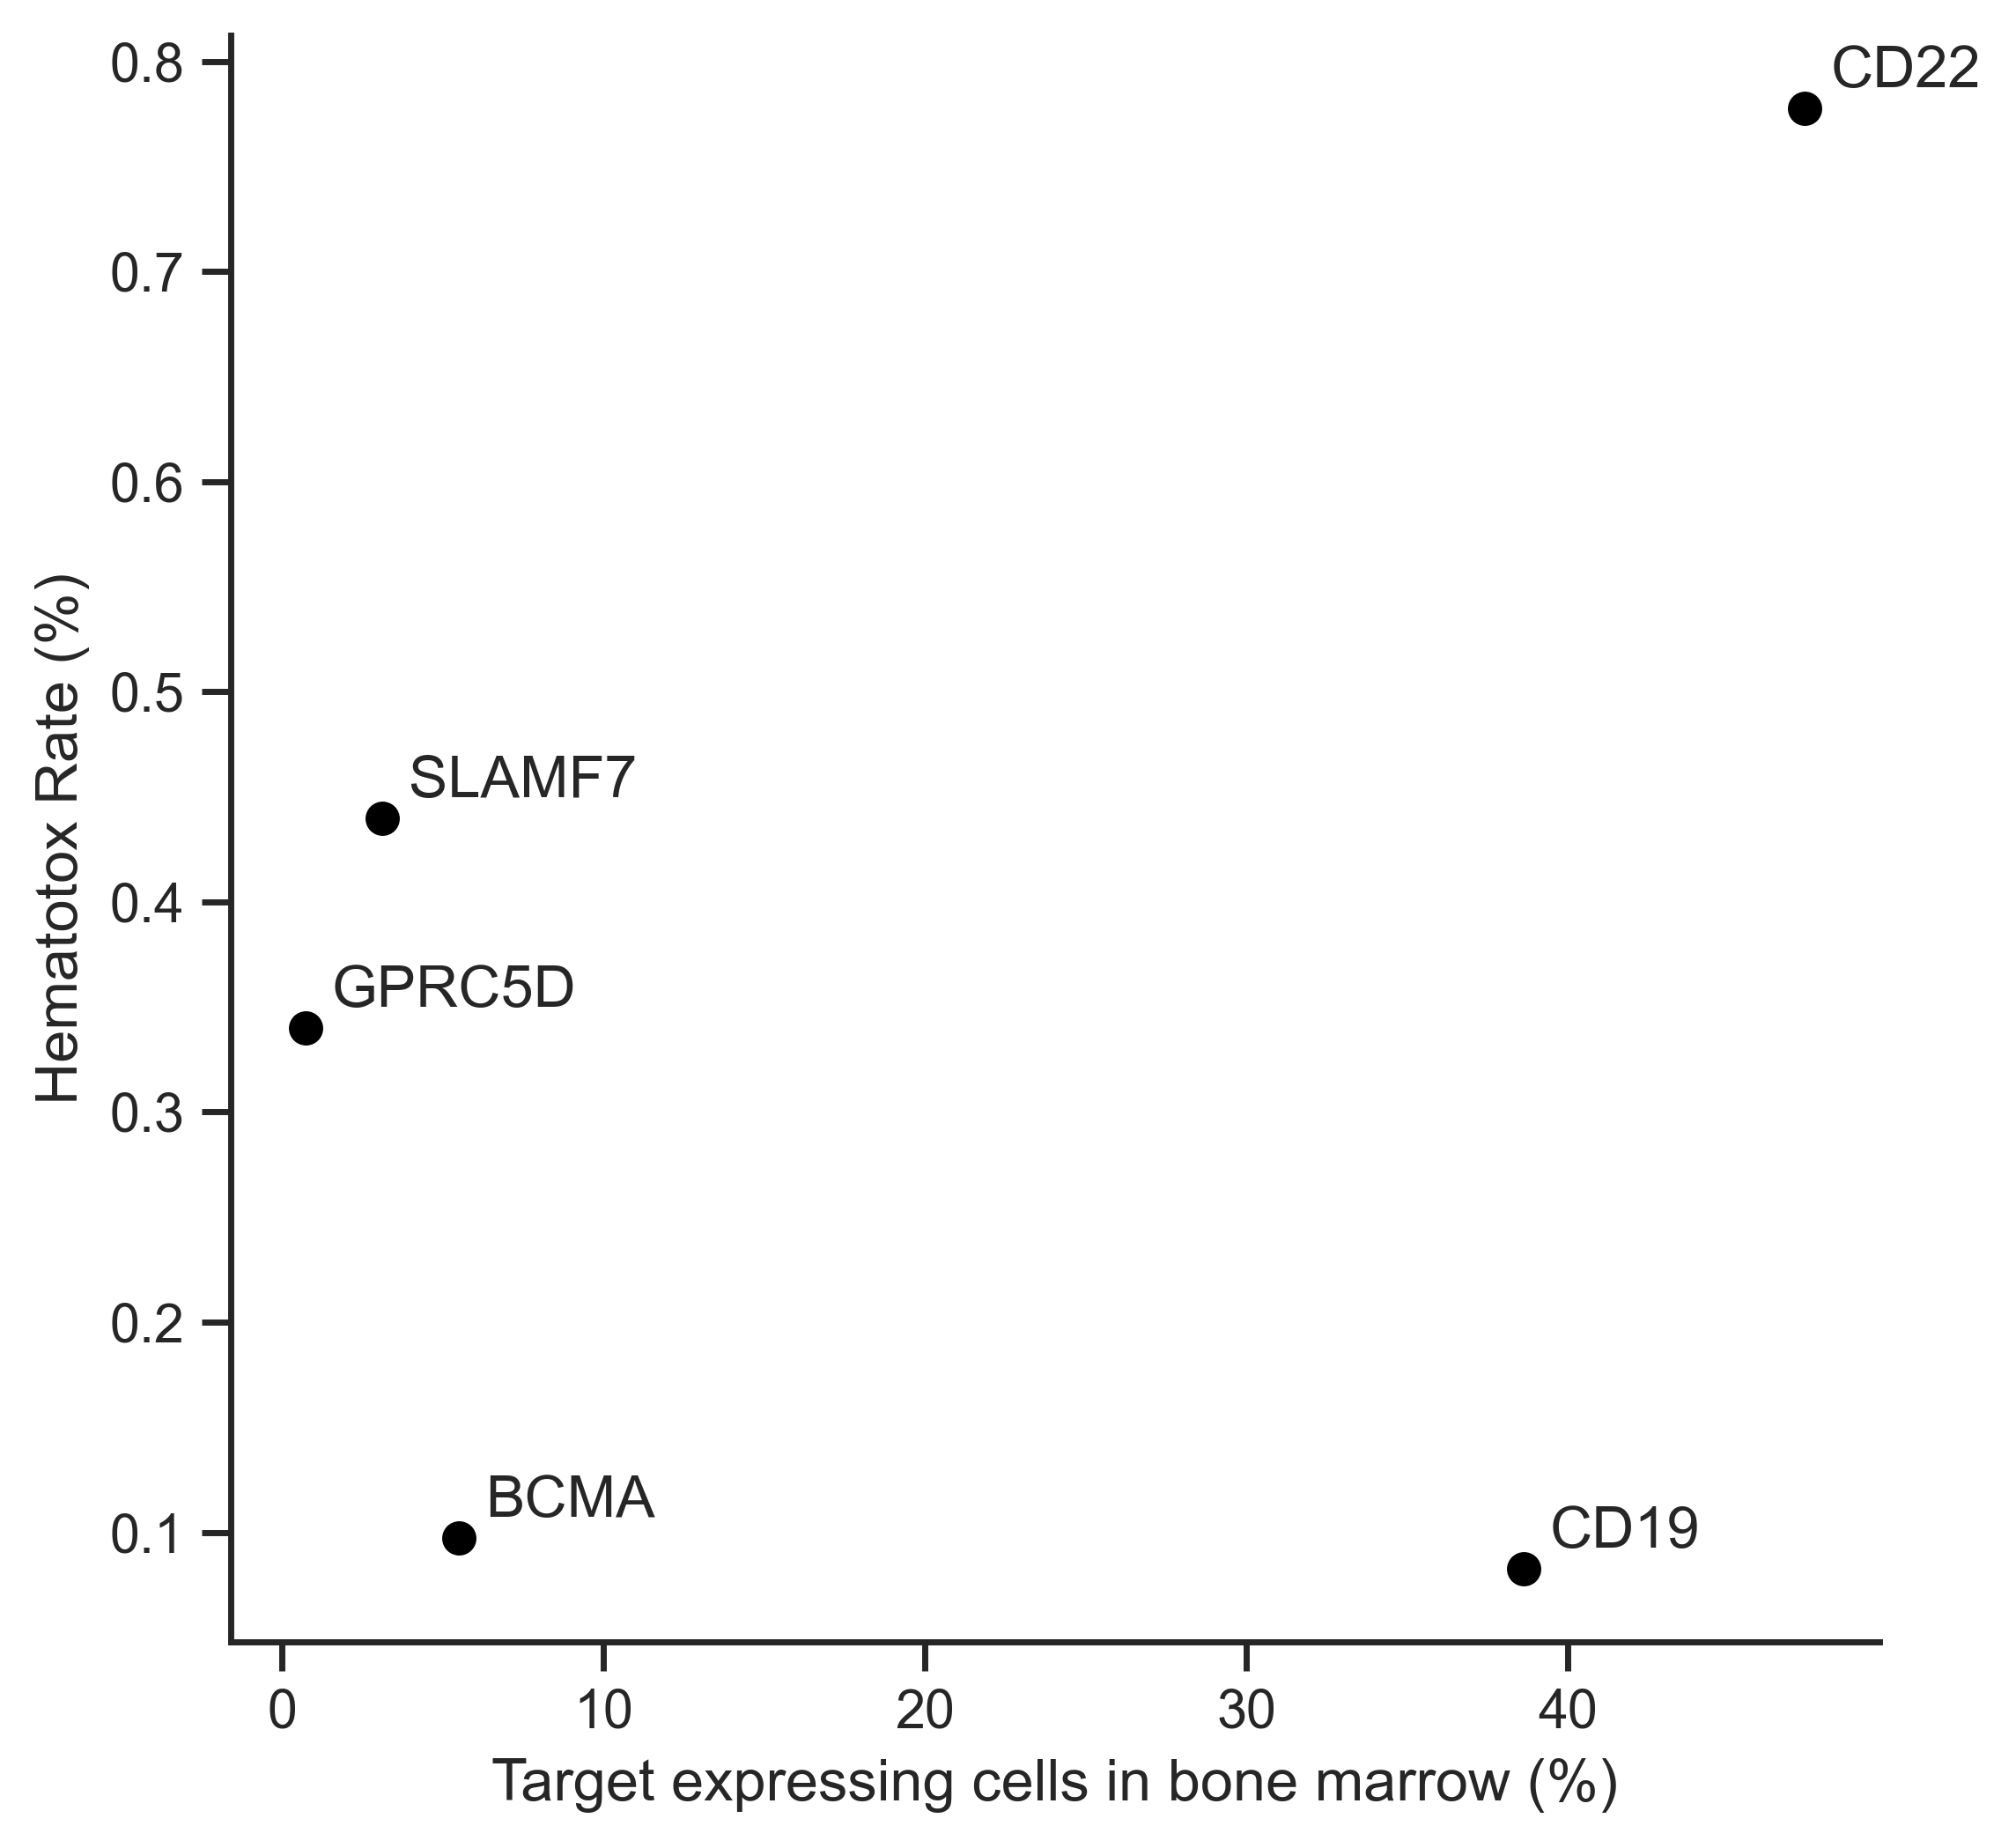

In [228]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Hematotox Rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.82, df_plot['Hematotox Rate'][i]+0.01))

    
plt.ylabel('Hematotox Rate (%)', size = 12)
plt.xlabel('Target expressing cells in bone marrow (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [231]:
expr=df_plot['percentages']
expr

NCT Number
BCMA       5.506073
CD19      38.623482
CD22      47.368421
GPRC5D     0.728745
SLAMF7     3.117409
Name: percentages, dtype: float64

In [232]:
rate=df_plot['Severe CRS rate']
rate

NCT Number
BCMA      0.104891
CD19      0.170124
CD22      0.097549
GPRC5D    0.029412
SLAMF7    0.100000
Name: Severe CRS rate, dtype: float64

In [233]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.5738280914579281, pvalue=0.31173521774561913)

In [234]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.39999999999999997
0.5046315754686911


# Correlation with neurotoxicity

## Target-expressing brain-specific cells (Suppl. Fig. 2 g)

In [237]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [239]:
# only organ
ix=np.isin(adata.obs['Organ'], ['Brain']) 
adata_sub=adata[ix].copy()

In [243]:
order=['Astrocytes','Neurons',  'Oligodendrocytes','Microglial cells','Glial cells', 
 'Cerebellar epithelial cells','Neuronal stem cells', 'Vascular and leptomeningeal cells',
       'B cells','T cells','Neutrophils', 'Macrophages', 
       'Endothelial cells','Pericytes', 'Smooth muscle cells']

In [244]:
# remove unknown
ix=np.isin(adata_sub.obs['celltype'], order) 
adata_sub=adata_sub[ix].copy()

In [245]:
adata_sub.obs['celltype']=adata_sub.obs['celltype'].cat.reorder_categories(list(order), ordered=True)

In [263]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [264]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,0.592828,880,TNFRSF17
CD19,1.032734,1533,CD19
CD22,6.396481,9495,CD22
GPRC5D,6.104109,9061,GPRC5D
SLAMF7,0.585418,869,SLAMF7


In [265]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,0.592828,880,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,1.032734,1533,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,6.396481,9495,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,6.104109,9061,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,0.585418,869,SLAMF7


In [268]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

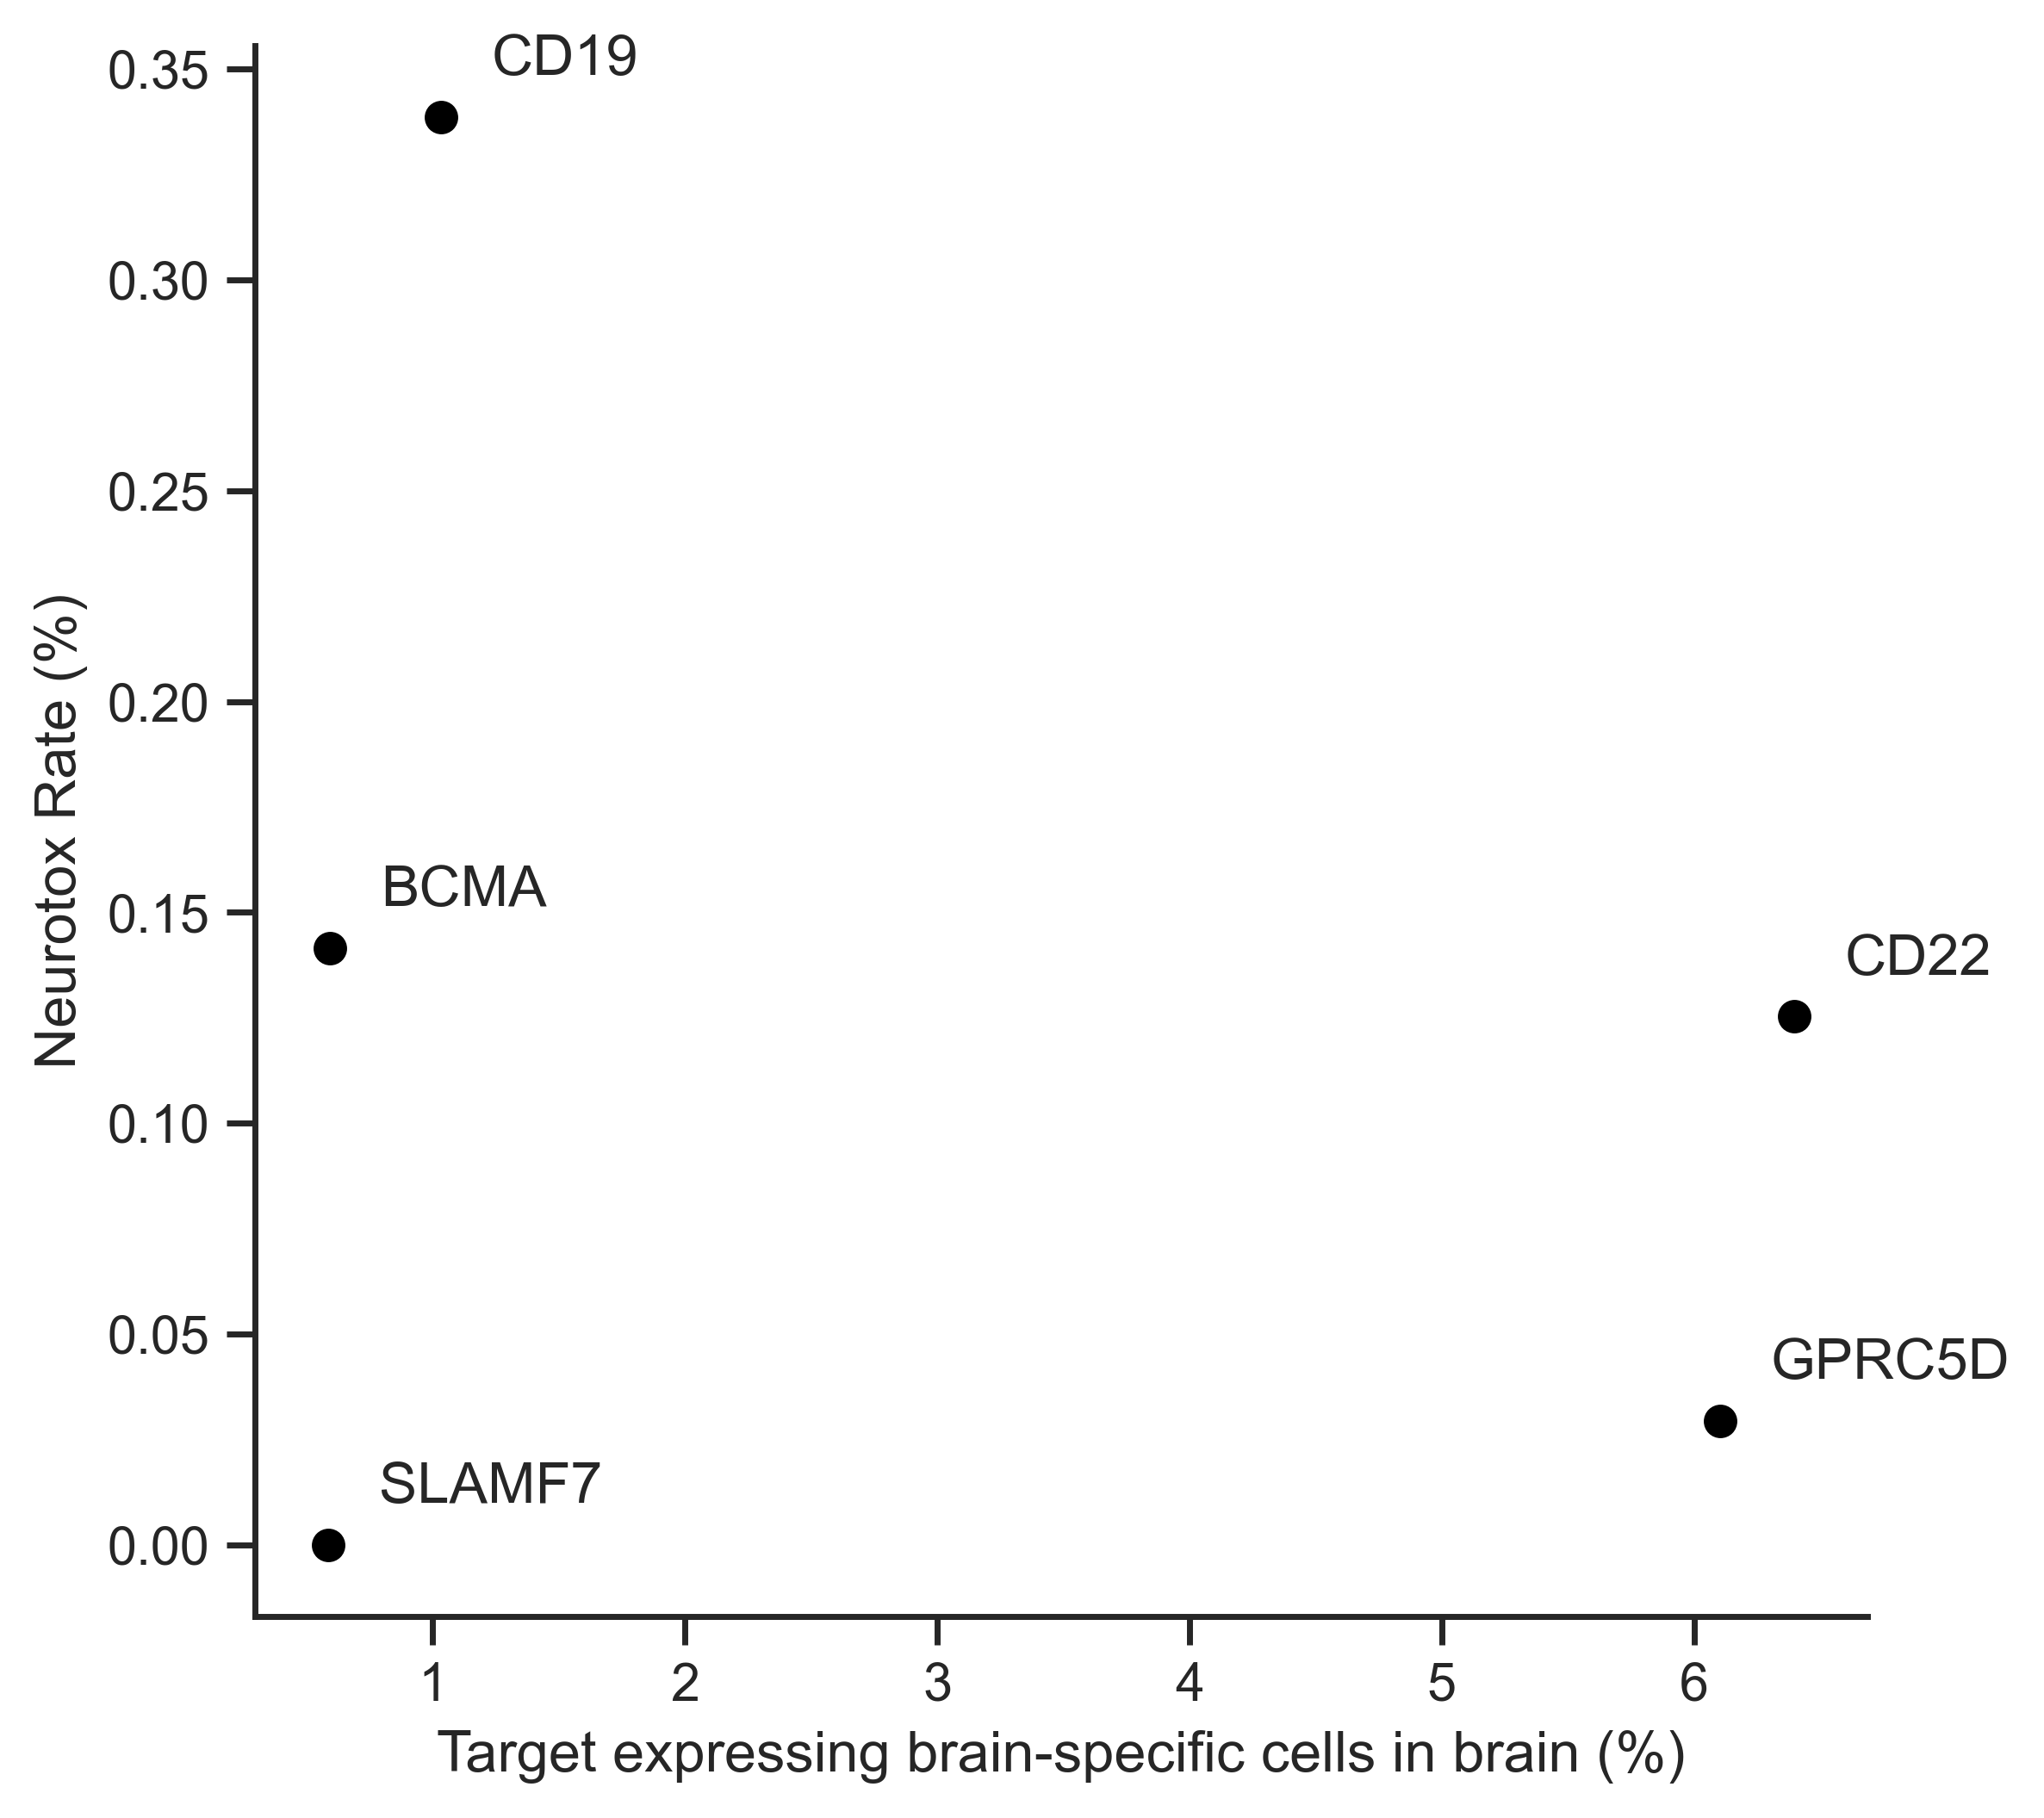

In [270]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Neuro Rate '], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.2, df_plot['Neuro Rate '][i]+0.01))

    
plt.ylabel('Neurotox Rate (%)', size = 12)
plt.xlabel('Target expressing brain-specific cells in brain (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [273]:
expr=df_plot['percentages']
expr

NCT Number
BCMA      0.592828
CD19      1.032734
CD22      6.396481
GPRC5D    6.104109
SLAMF7    0.585418
Name: percentages, dtype: float64

In [274]:
rate=df_plot['Neuro Rate ']
rate

NCT Number
BCMA      0.141615
CD19      0.338580
CD22      0.125294
GPRC5D    0.029412
SLAMF7    0.000000
Name: Neuro Rate , dtype: float64

In [275]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.28185070380152727, pvalue=0.6459461677861371)

In [276]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.19999999999999998
0.747060078104662


## Target-expressing immune cells in brain (Suppl. Fig. 2 g)

In [279]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [280]:
sc.set_figure_params(vector_friendly=True, color_map='Reds',dpi=200,transparent=True, fontsize=14)

In [281]:
# only organ
ix=np.isin(adata.obs['Organ'], ['Brain']) 
adata_sub=adata[ix].copy()

In [284]:
len(adata_sub.obs['celltype'].cat.categories)

16

In [286]:
# remove unknown
ix=np.isin(adata_sub.obs['celltype'], order) 
adata_sub=adata_sub[ix].copy()

In [290]:
lymphatic_cells=['B cells','Plasma cells','T cells','NK cells',
                 'Dendritic cells','Macrophages','Lymphatic endothelial cells', 'Mast cells','Neutrophils']

In [291]:
ix=np.isin(adata_sub.obs['celltype'], lymphatic_cells) 
adata_sub=adata_sub[ix].copy()

In [292]:
adata_sub

AnnData object with n_obs × n_vars = 3447 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [306]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [307]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,0.406150,14,TNFRSF17
CD19,0.116043,4,CD19
CD22,1.015376,35,CD22
GPRC5D,0.000000,0,GPRC5D
SLAMF7,0.232086,8,SLAMF7


In [308]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,0.406150,14,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,0.116043,4,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,1.015376,35,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.000000,0,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,0.232086,8,SLAMF7


In [311]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

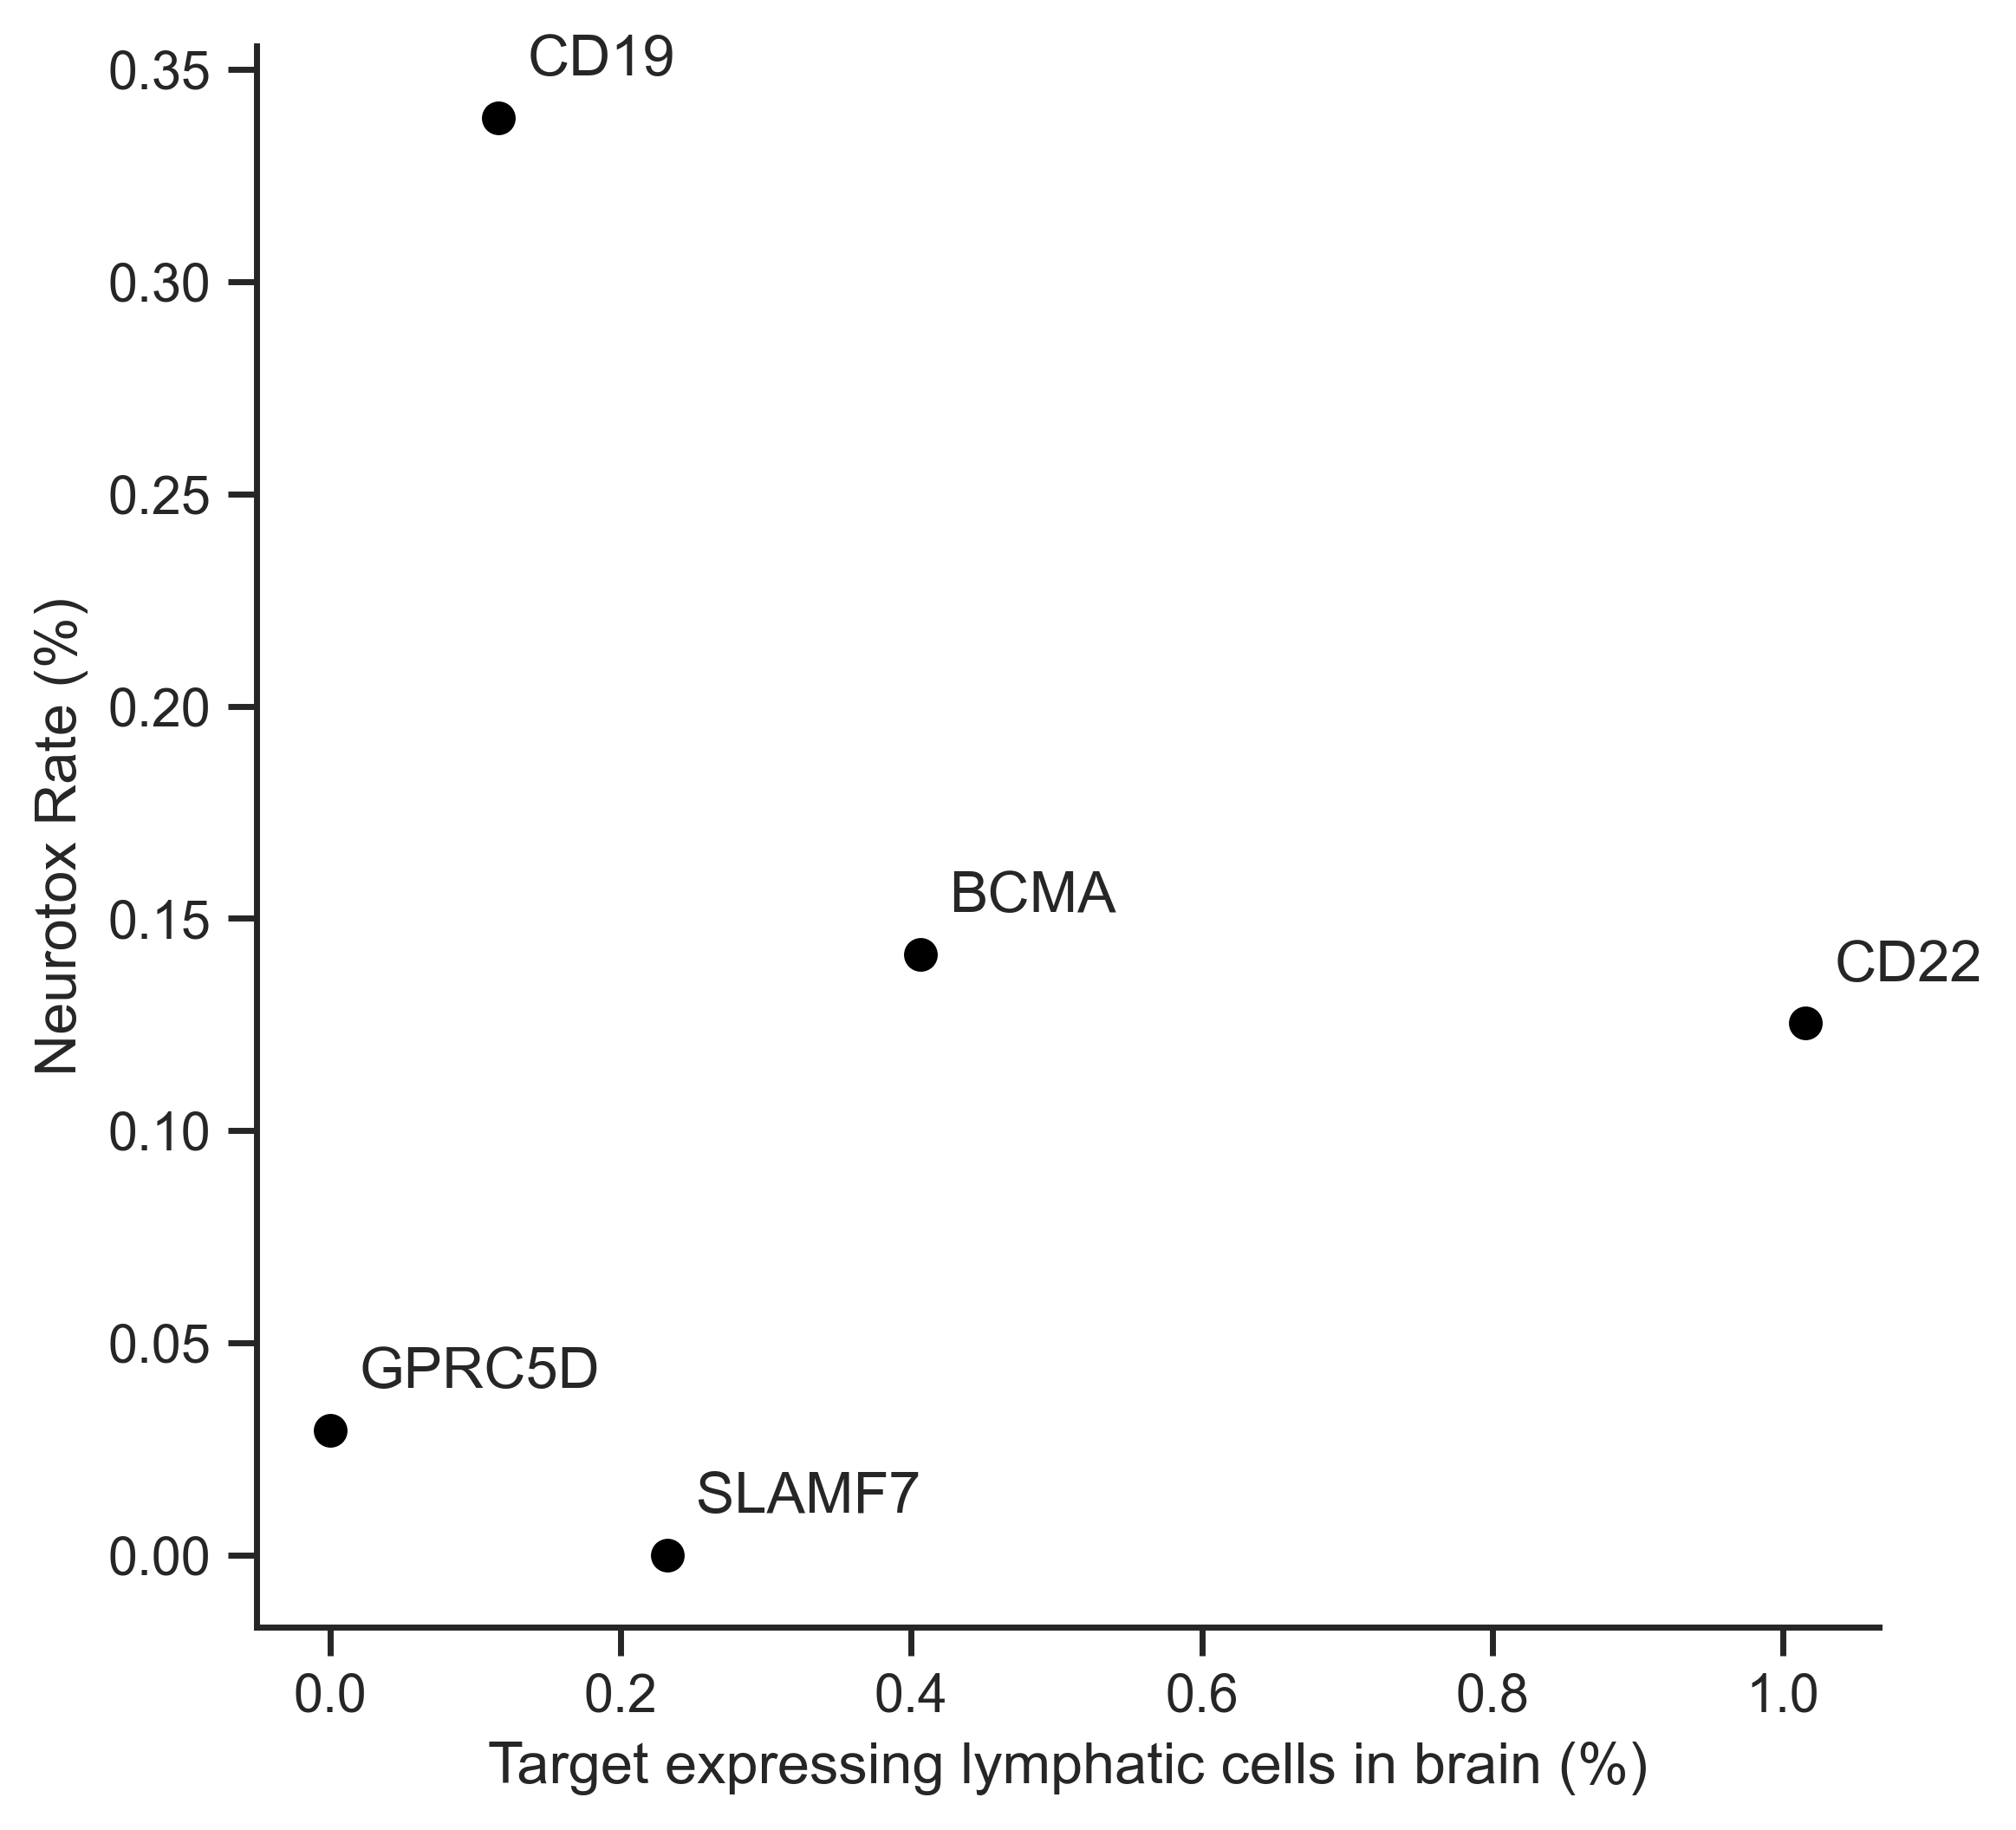

In [313]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Neuro Rate '], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.02, df_plot['Neuro Rate '][i]+0.01))

    
plt.ylabel('Neurotox Rate (%)', size = 12)
plt.xlabel('Target expressing lymphatic cells in brain (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [316]:
expr=df_plot['percentages']
expr

NCT Number
BCMA      0.406150
CD19      0.116043
CD22      1.015376
GPRC5D    0.000000
SLAMF7    0.232086
Name: percentages, dtype: float64

In [317]:
rate=df_plot['Neuro Rate ']
rate

NCT Number
BCMA      0.141615
CD19      0.338580
CD22      0.125294
GPRC5D    0.029412
SLAMF7    0.000000
Name: Neuro Rate , dtype: float64

In [318]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.0032229672613984135, pvalue=0.9958963977357981)

In [319]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.09999999999999999
0.8728885715695383


# Correlation with severe CRS rate

## Target-expressing immune cells in blood (Suppl. Fig. 2 h)

In [323]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [325]:
# only organ
ix=np.isin(adata.obs['Organ'], ['Blood']) 
adata_sub=adata[ix].copy()

In [ ]:
immune_cells = ['Lymphatic endothelial cells',
 'Common lymphoid progenitor cells',
 'Innate lymphoid cells',
 'Lymphocytes',
 'B cells',
 'T cells',
 'NK cells',
 'Plasma cells',
 'Leukocytes',
 'Common myeloid progenitor cells',
 'Myeloid cells',
 'Granulocyte-monocyte progenitor cells',
 'Granulocyte cells',
 'Basophil cells',
 'Eosinophils',
 'Neutrophils',
 'Neutrophil-myeloid progenitor cells',
 'Monocytes',
 'Macrophages',
 'Dendritic cells',
 'Mast cells',
 'Megakaryocytes',
 'Thrombocytes',
 'Erythroid progenitor cells',
 'Erythroid cells']

In [331]:
ix=np.isin(adata_sub.obs['celltype'], immune_cells) 
adata_sub=adata_sub[ix].copy()

In [332]:
adata_sub

AnnData object with n_obs × n_vars = 109168 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [357]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [358]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,0.787777,860,TNFRSF17
CD19,1.401510,1530,CD19
CD22,2.486077,2714,CD22
GPRC5D,0.183204,200,GPRC5D
SLAMF7,5.575810,6087,SLAMF7


In [359]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,0.787777,860,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,1.401510,1530,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,2.486077,2714,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.183204,200,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,5.575810,6087,SLAMF7


In [362]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

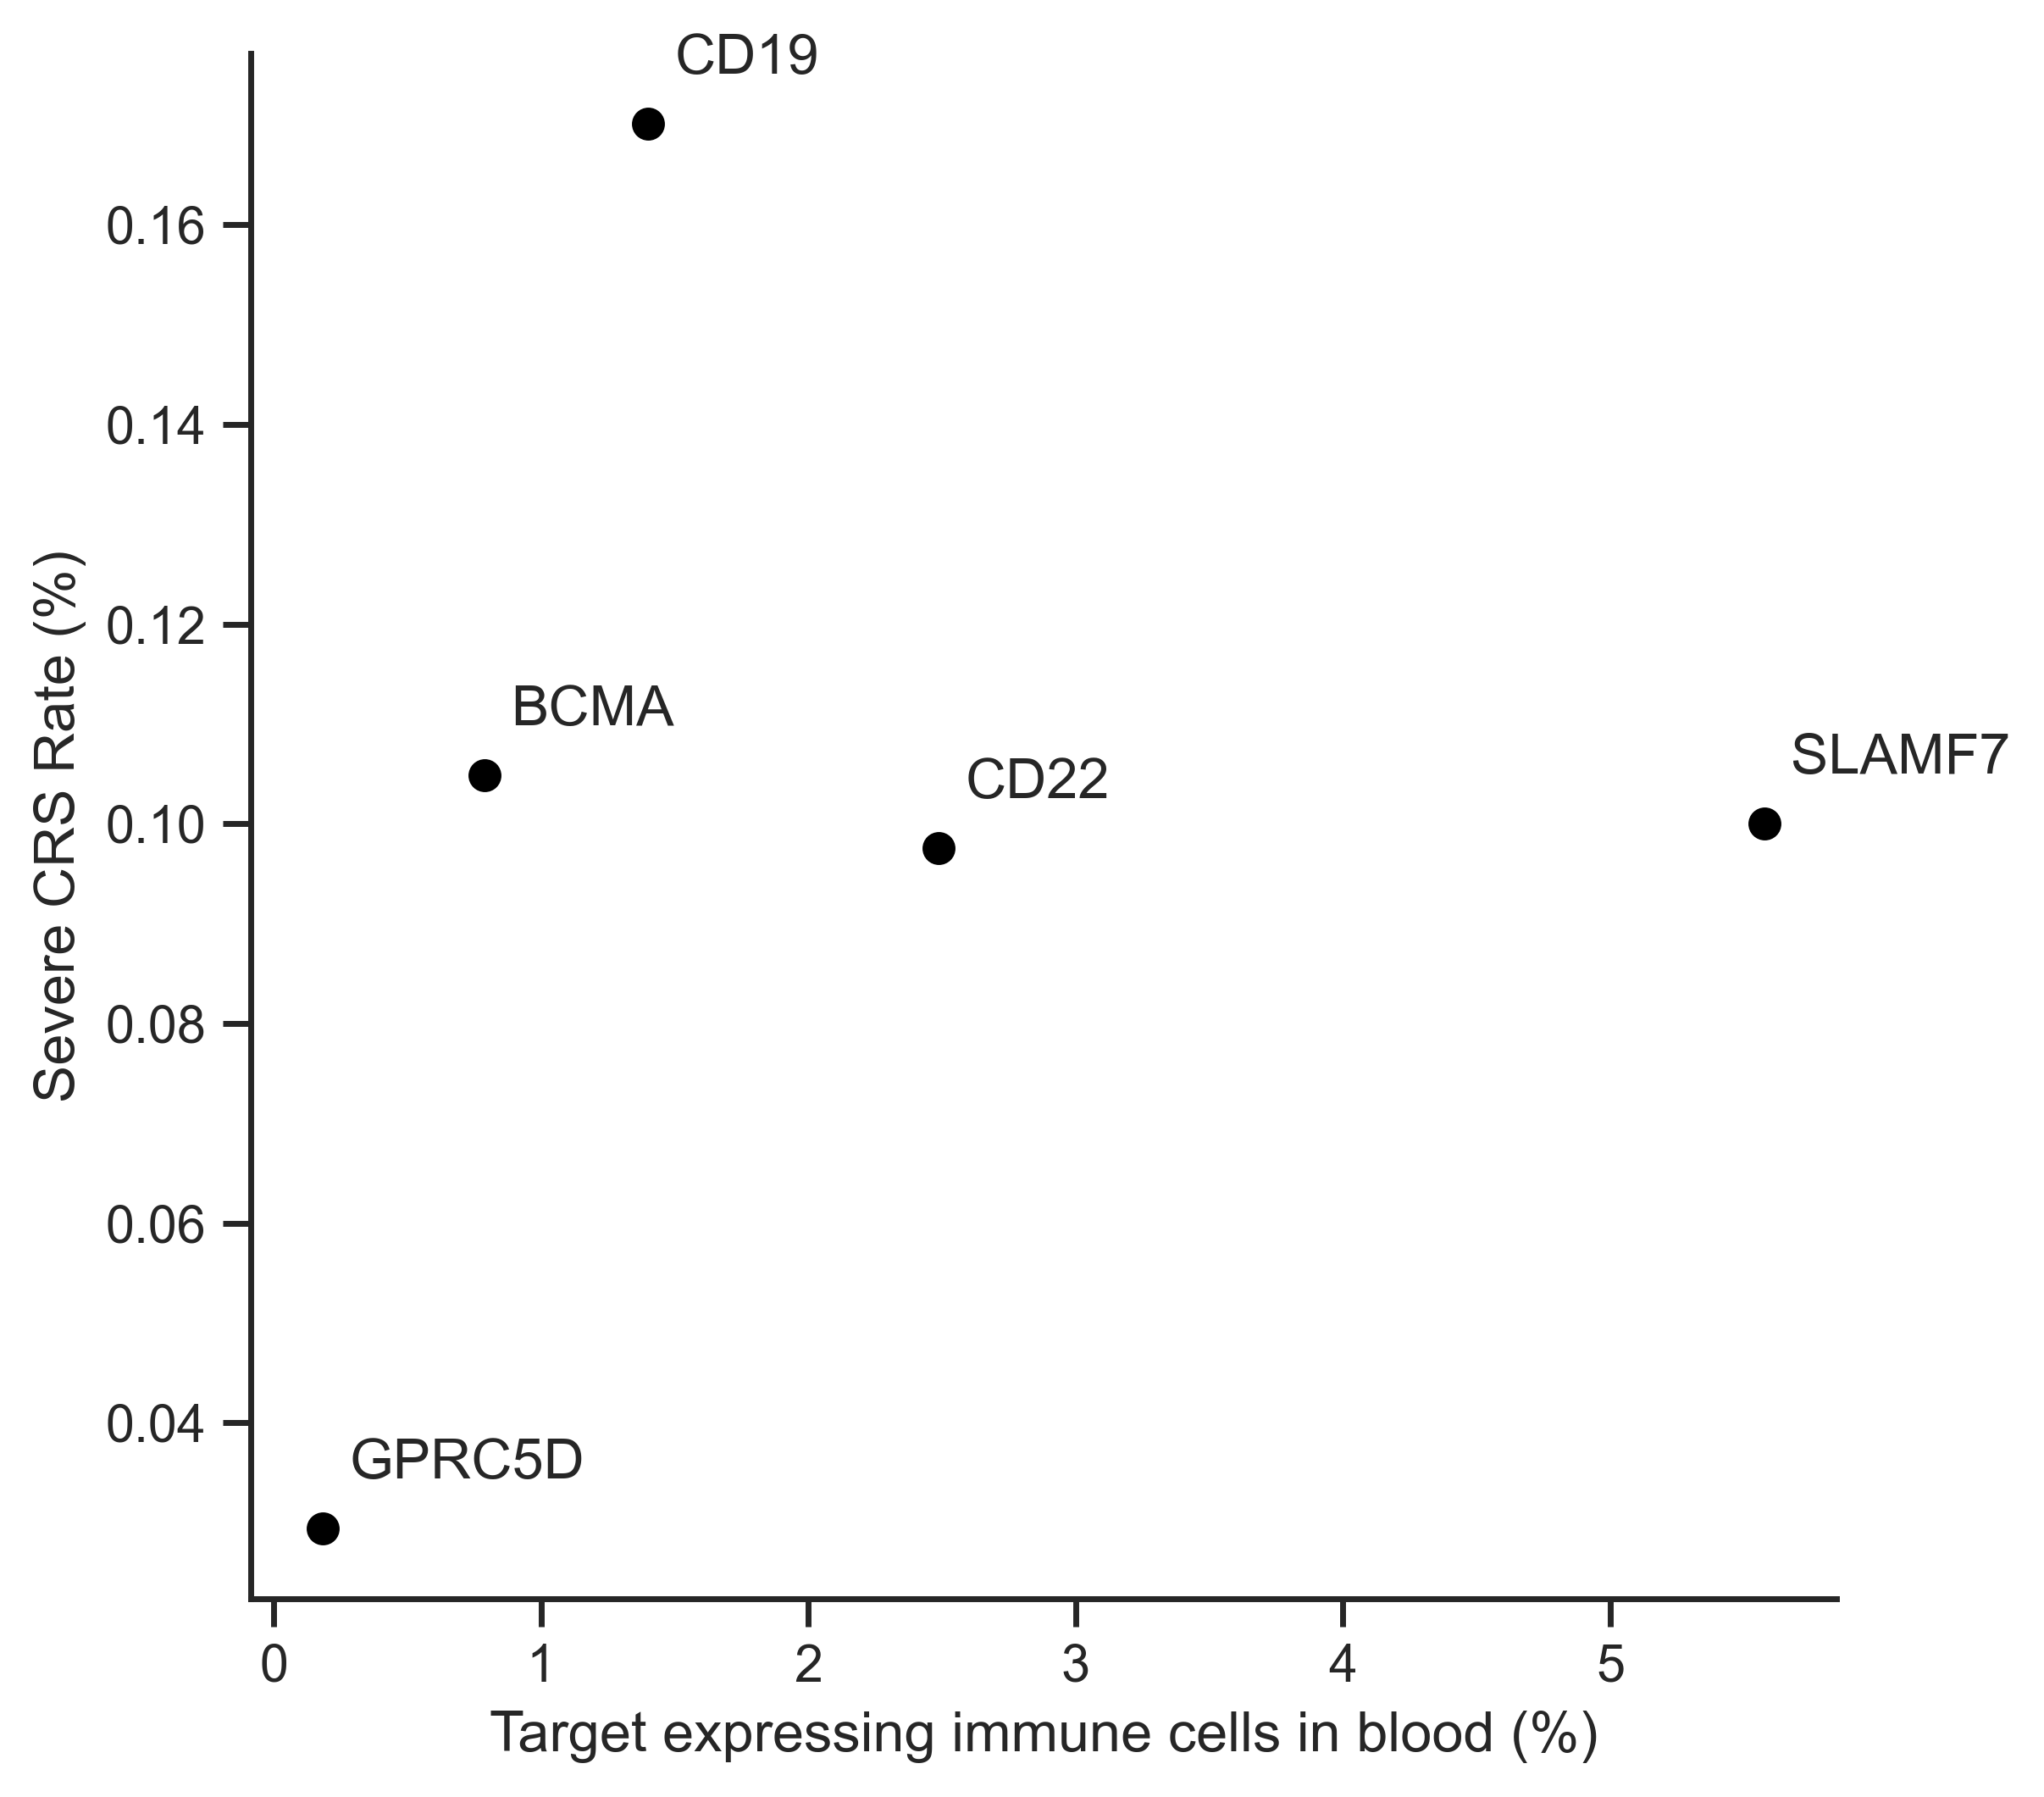

In [364]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Severe CRS rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.1, df_plot['Severe CRS rate'][i]+0.005))

    
plt.ylabel('Severe CRS Rate (%)', size = 12)
plt.xlabel('Target expressing immune cells in blood (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


#ax.xaxis.grid()
#ax.yaxis.grid()
    
#ax.set_ylim([0, 100])
#plt.yticks([0,20,40,60,80,100])
#plt.xticks([0,20,40,60,80,100])
plt.savefig('/Users/moritz.thomas/Documents/ZZ_NotebooksFromServer/TumorToxicity/HealthyAtlas/figures/severe_crs_blood_pct.pdf')



In [367]:
expr=df_plot['percentages']
expr

NCT Number
BCMA      0.787777
CD19      1.401510
CD22      2.486077
GPRC5D    0.183204
SLAMF7    5.575810
Name: percentages, dtype: float64

In [368]:
rate=df_plot['Severe CRS rate']
rate

NCT Number
BCMA      0.104891
CD19      0.170124
CD22      0.097549
GPRC5D    0.029412
SLAMF7    0.100000
Name: Severe CRS rate, dtype: float64

In [369]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.18624382366763223, pvalue=0.7642451174076306)

In [370]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.19999999999999998
0.747060078104662


## Target-expressing immune cells in bone marrow (Suppl. Fig. 2 h)

In [373]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [375]:
# only organ
ix=np.isin(adata.obs['Organ'], ['BoneMarrow']) 
adata_sub=adata[ix].copy()

In [ ]:
immune_cells = ['Lymphatic endothelial cells',
 'Common lymphoid progenitor cells',
 'Innate lymphoid cells',
 'Lymphocytes',
 'B cells',
 'T cells',
 'NK cells',
 'Plasma cells',
 'Leukocytes',
 'Common myeloid progenitor cells',
 'Myeloid cells',
 'Granulocyte-monocyte progenitor cells',
 'Granulocyte cells',
 'Basophil cells',
 'Eosinophils',
 'Neutrophils',
 'Neutrophil-myeloid progenitor cells',
 'Monocytes',
 'Macrophages',
 'Dendritic cells',
 'Mast cells',
 'Megakaryocytes',
 'Thrombocytes',
 'Erythroid progenitor cells',
 'Erythroid cells']

In [381]:
ix=np.isin(adata_sub.obs['celltype'], immune_cells) 
adata_sub=adata_sub[ix].copy()

In [382]:
adata_sub

AnnData object with n_obs × n_vars = 69146 × 5
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3'

In [407]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [408]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,1.815000,1255,TNFRSF17
CD19,2.164984,1497,CD19
CD22,2.083996,1441,CD22
GPRC5D,0.208255,144,GPRC5D
SLAMF7,12.550256,8678,SLAMF7


In [409]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,1.815000,1255,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,2.164984,1497,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,2.083996,1441,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.208255,144,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,12.550256,8678,SLAMF7


In [412]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

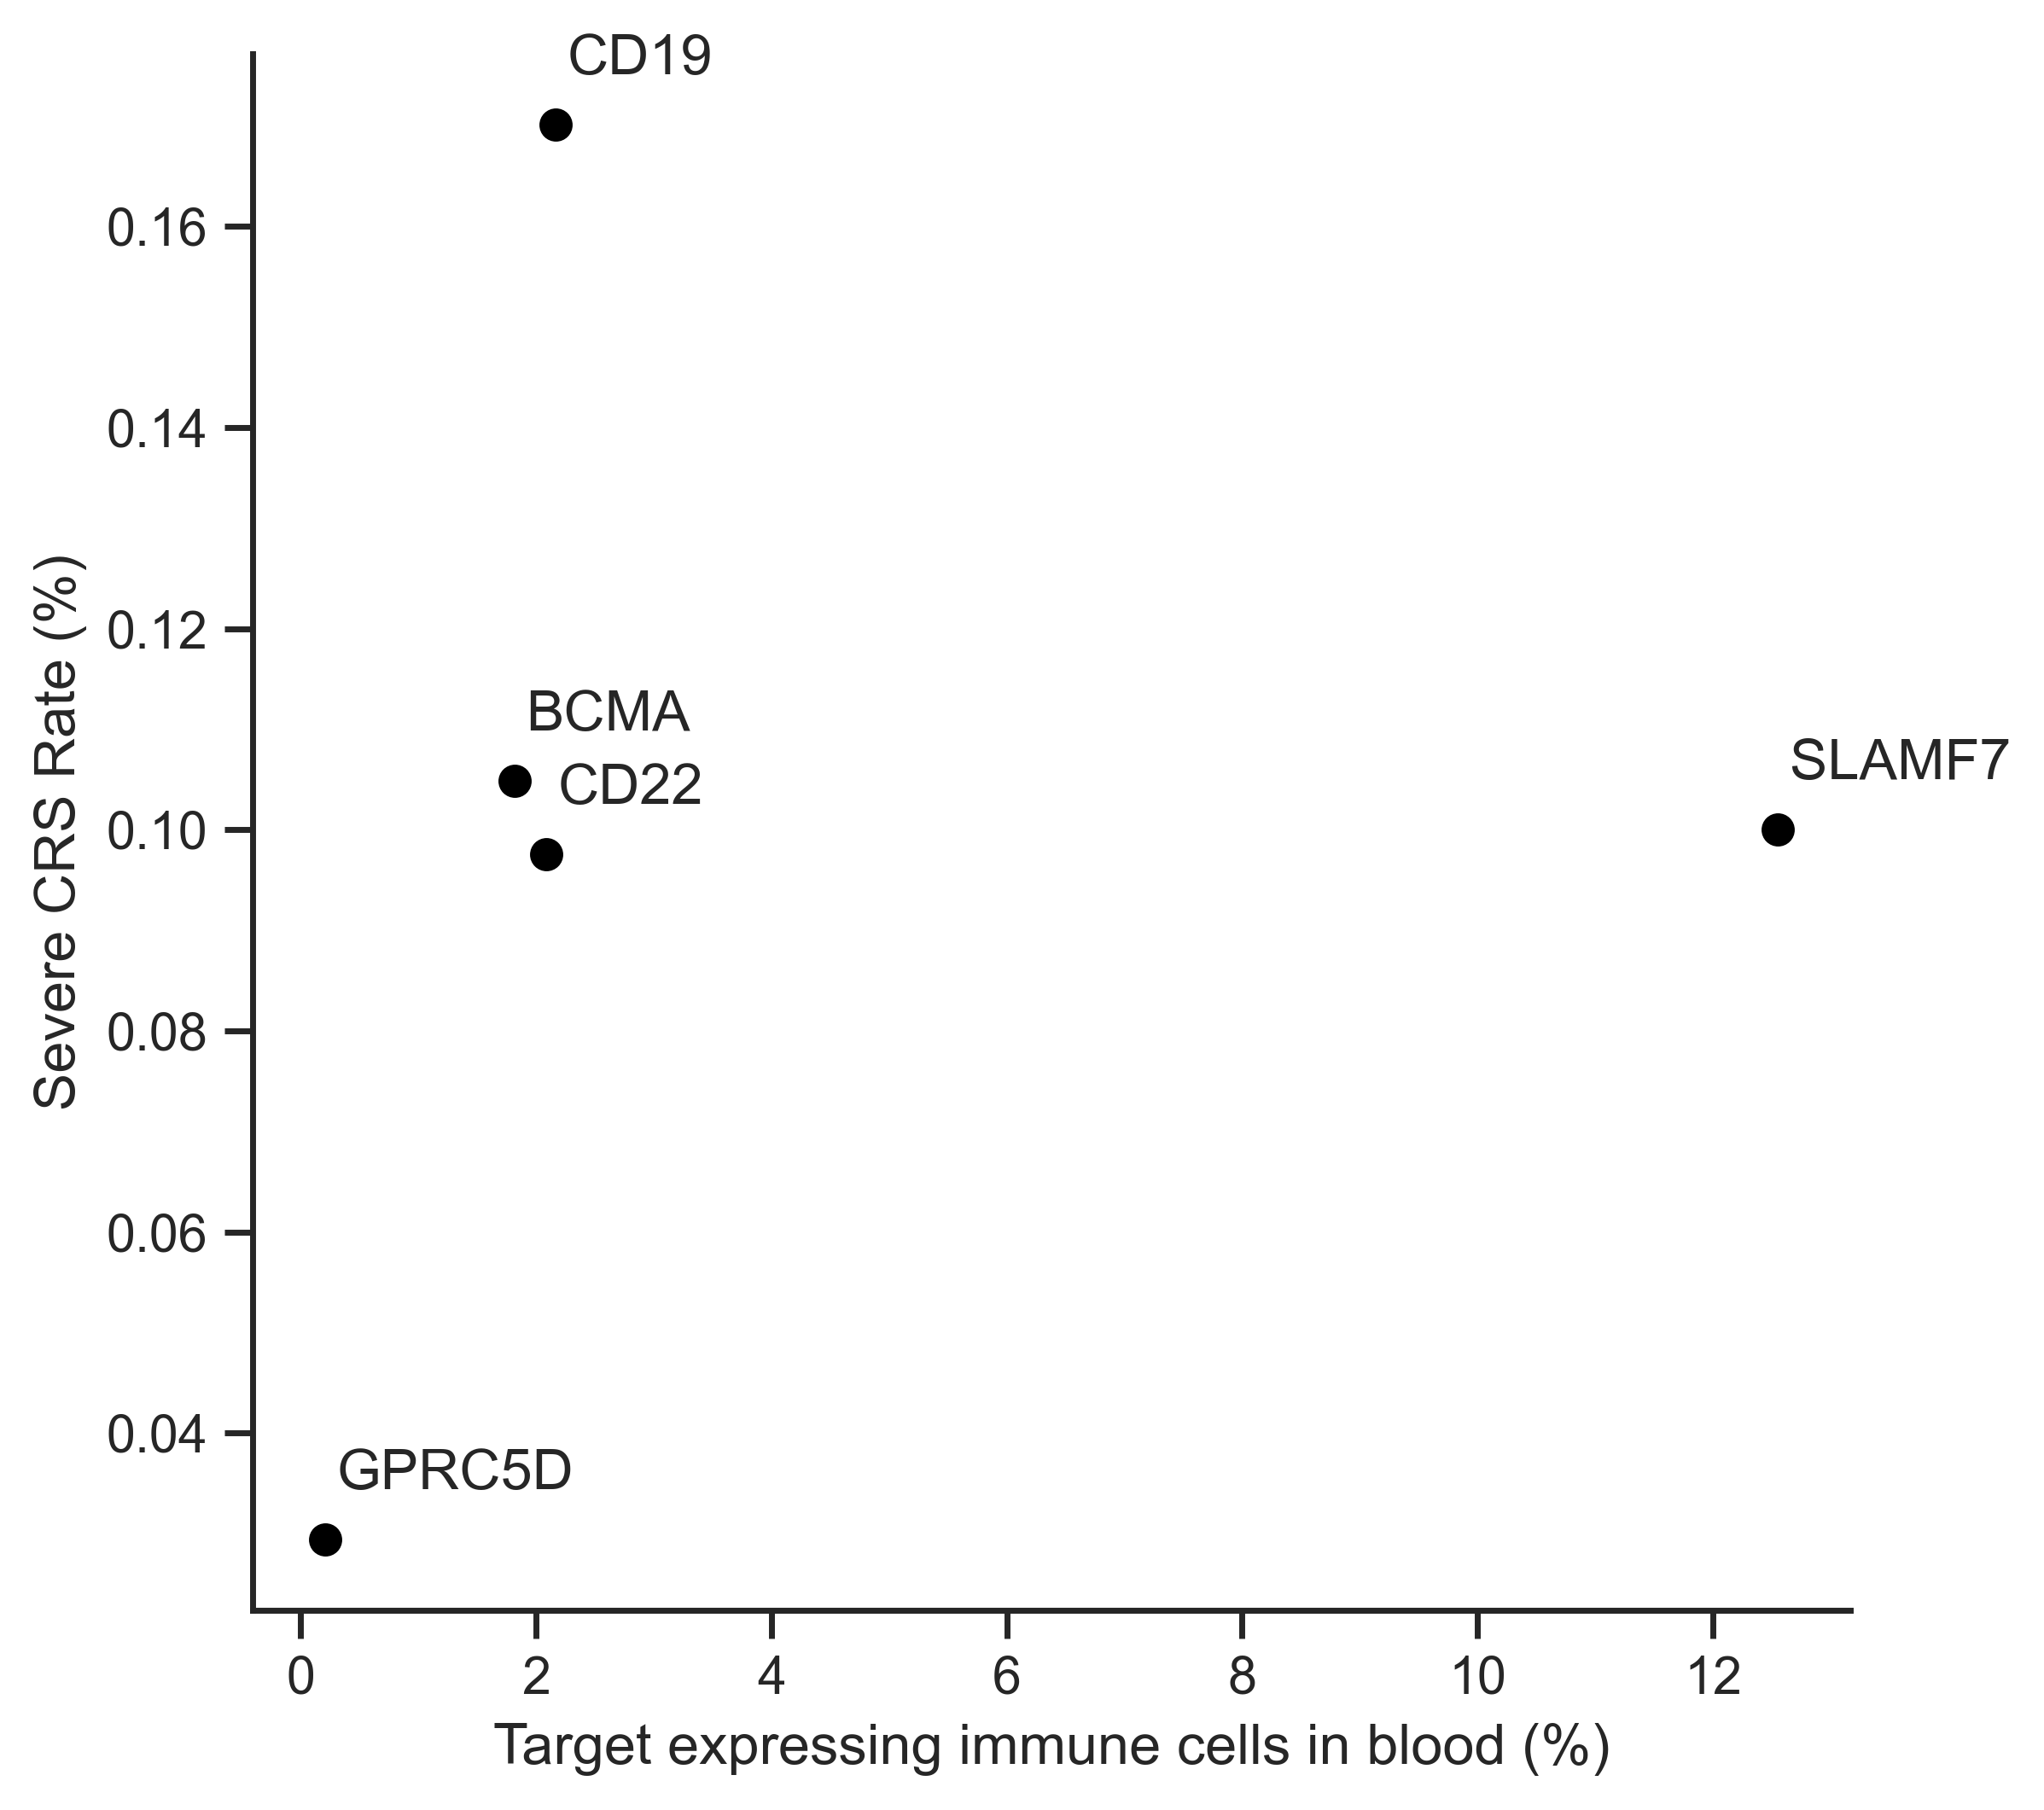

In [414]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Severe CRS rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.1, df_plot['Severe CRS rate'][i]+0.005))

    
plt.ylabel('Severe CRS Rate (%)', size = 12)
plt.xlabel('Target expressing immune cells in blood (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [417]:
expr=df_plot['percentages']
expr

NCT Number
BCMA       1.815000
CD19       2.164984
CD22       2.083996
GPRC5D     0.208255
SLAMF7    12.550256
Name: percentages, dtype: float64

In [418]:
rate=df_plot['Severe CRS rate']
rate

NCT Number
BCMA      0.104891
CD19      0.170124
CD22      0.097549
GPRC5D    0.029412
SLAMF7    0.100000
Name: Severe CRS rate, dtype: float64

In [419]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.13458478145467553, pvalue=0.829160053865409)

In [420]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.49999999999999994
0.39100221895577053


## Target-expressing immune cells in lymph nodes (Suppl. Fig. 2 h)

In [423]:
adata=adata[:,clinical_targets].copy()

/Users/moritz.thomas/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [425]:
# only organ
ix=np.isin(adata.obs['Organ'], ['LymphNode']) 
adata_sub=adata[ix].copy()

In [ ]:
immune_cells = ['Lymphatic endothelial cells',
 'Common lymphoid progenitor cells',
 'Innate lymphoid cells',
 'Lymphocytes',
 'B cells',
 'T cells',
 'NK cells',
 'Plasma cells',
 'Leukocytes',
 'Common myeloid progenitor cells',
 'Myeloid cells',
 'Granulocyte-monocyte progenitor cells',
 'Granulocyte cells',
 'Basophil cells',
 'Eosinophils',
 'Neutrophils',
 'Neutrophil-myeloid progenitor cells',
 'Monocytes',
 'Macrophages',
 'Dendritic cells',
 'Mast cells',
 'Megakaryocytes',
 'Thrombocytes',
 'Erythroid progenitor cells',
 'Erythroid cells']

In [431]:
ix=np.isin(adata_sub.obs['celltype'], immune_cells) 
adata_sub=adata_sub[ix].copy()

In [457]:
df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()
df_clinical.index=df_clinical['NCT Number']
df_clinical

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/1048653169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clinical=clinical_data_sub.groupby('NCT Number').mean().reset_index()


,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate
NCT Number,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000


In [458]:
df_scrna=df_fin.rename(index={'TNFRSF17': 'BCMA'})
df_scrna=df_scrna.reindex(df_clinical.index)
df_scrna

,percentages,absolutes,targets
NCT Number,,,
BCMA,3.948735,7755,TNFRSF17
CD19,14.414029,28308,CD19
CD22,15.269461,29988,CD22
GPRC5D,0.392073,770,GPRC5D
SLAMF7,6.063383,11908,SLAMF7


In [459]:
df_plot=pd.concat([df_clinical, df_scrna], axis=1, join="inner")
df_plot

,NCT Number,ORR,CRS rate,Severe CRS rate,Neuro Rate,Hematotox Rate,percentages,absolutes,targets
NCT Number,,,,,,,,,
BCMA,BCMA,0.803529,0.748246,0.104891,0.141615,0.097213,3.948735,7755,TNFRSF17
CD19,CD19,0.786539,0.744340,0.170124,0.338580,0.082568,14.414029,28308,CD19
CD22,CD22,0.642619,0.829734,0.097549,0.125294,0.777778,15.269461,29988,CD22
GPRC5D,GPRC5D,0.875000,0.941176,0.029412,0.029412,0.340138,0.392073,770,GPRC5D
SLAMF7,SLAMF7,0.100000,0.100000,0.100000,0.000000,0.440000,6.063383,11908,SLAMF7


In [462]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

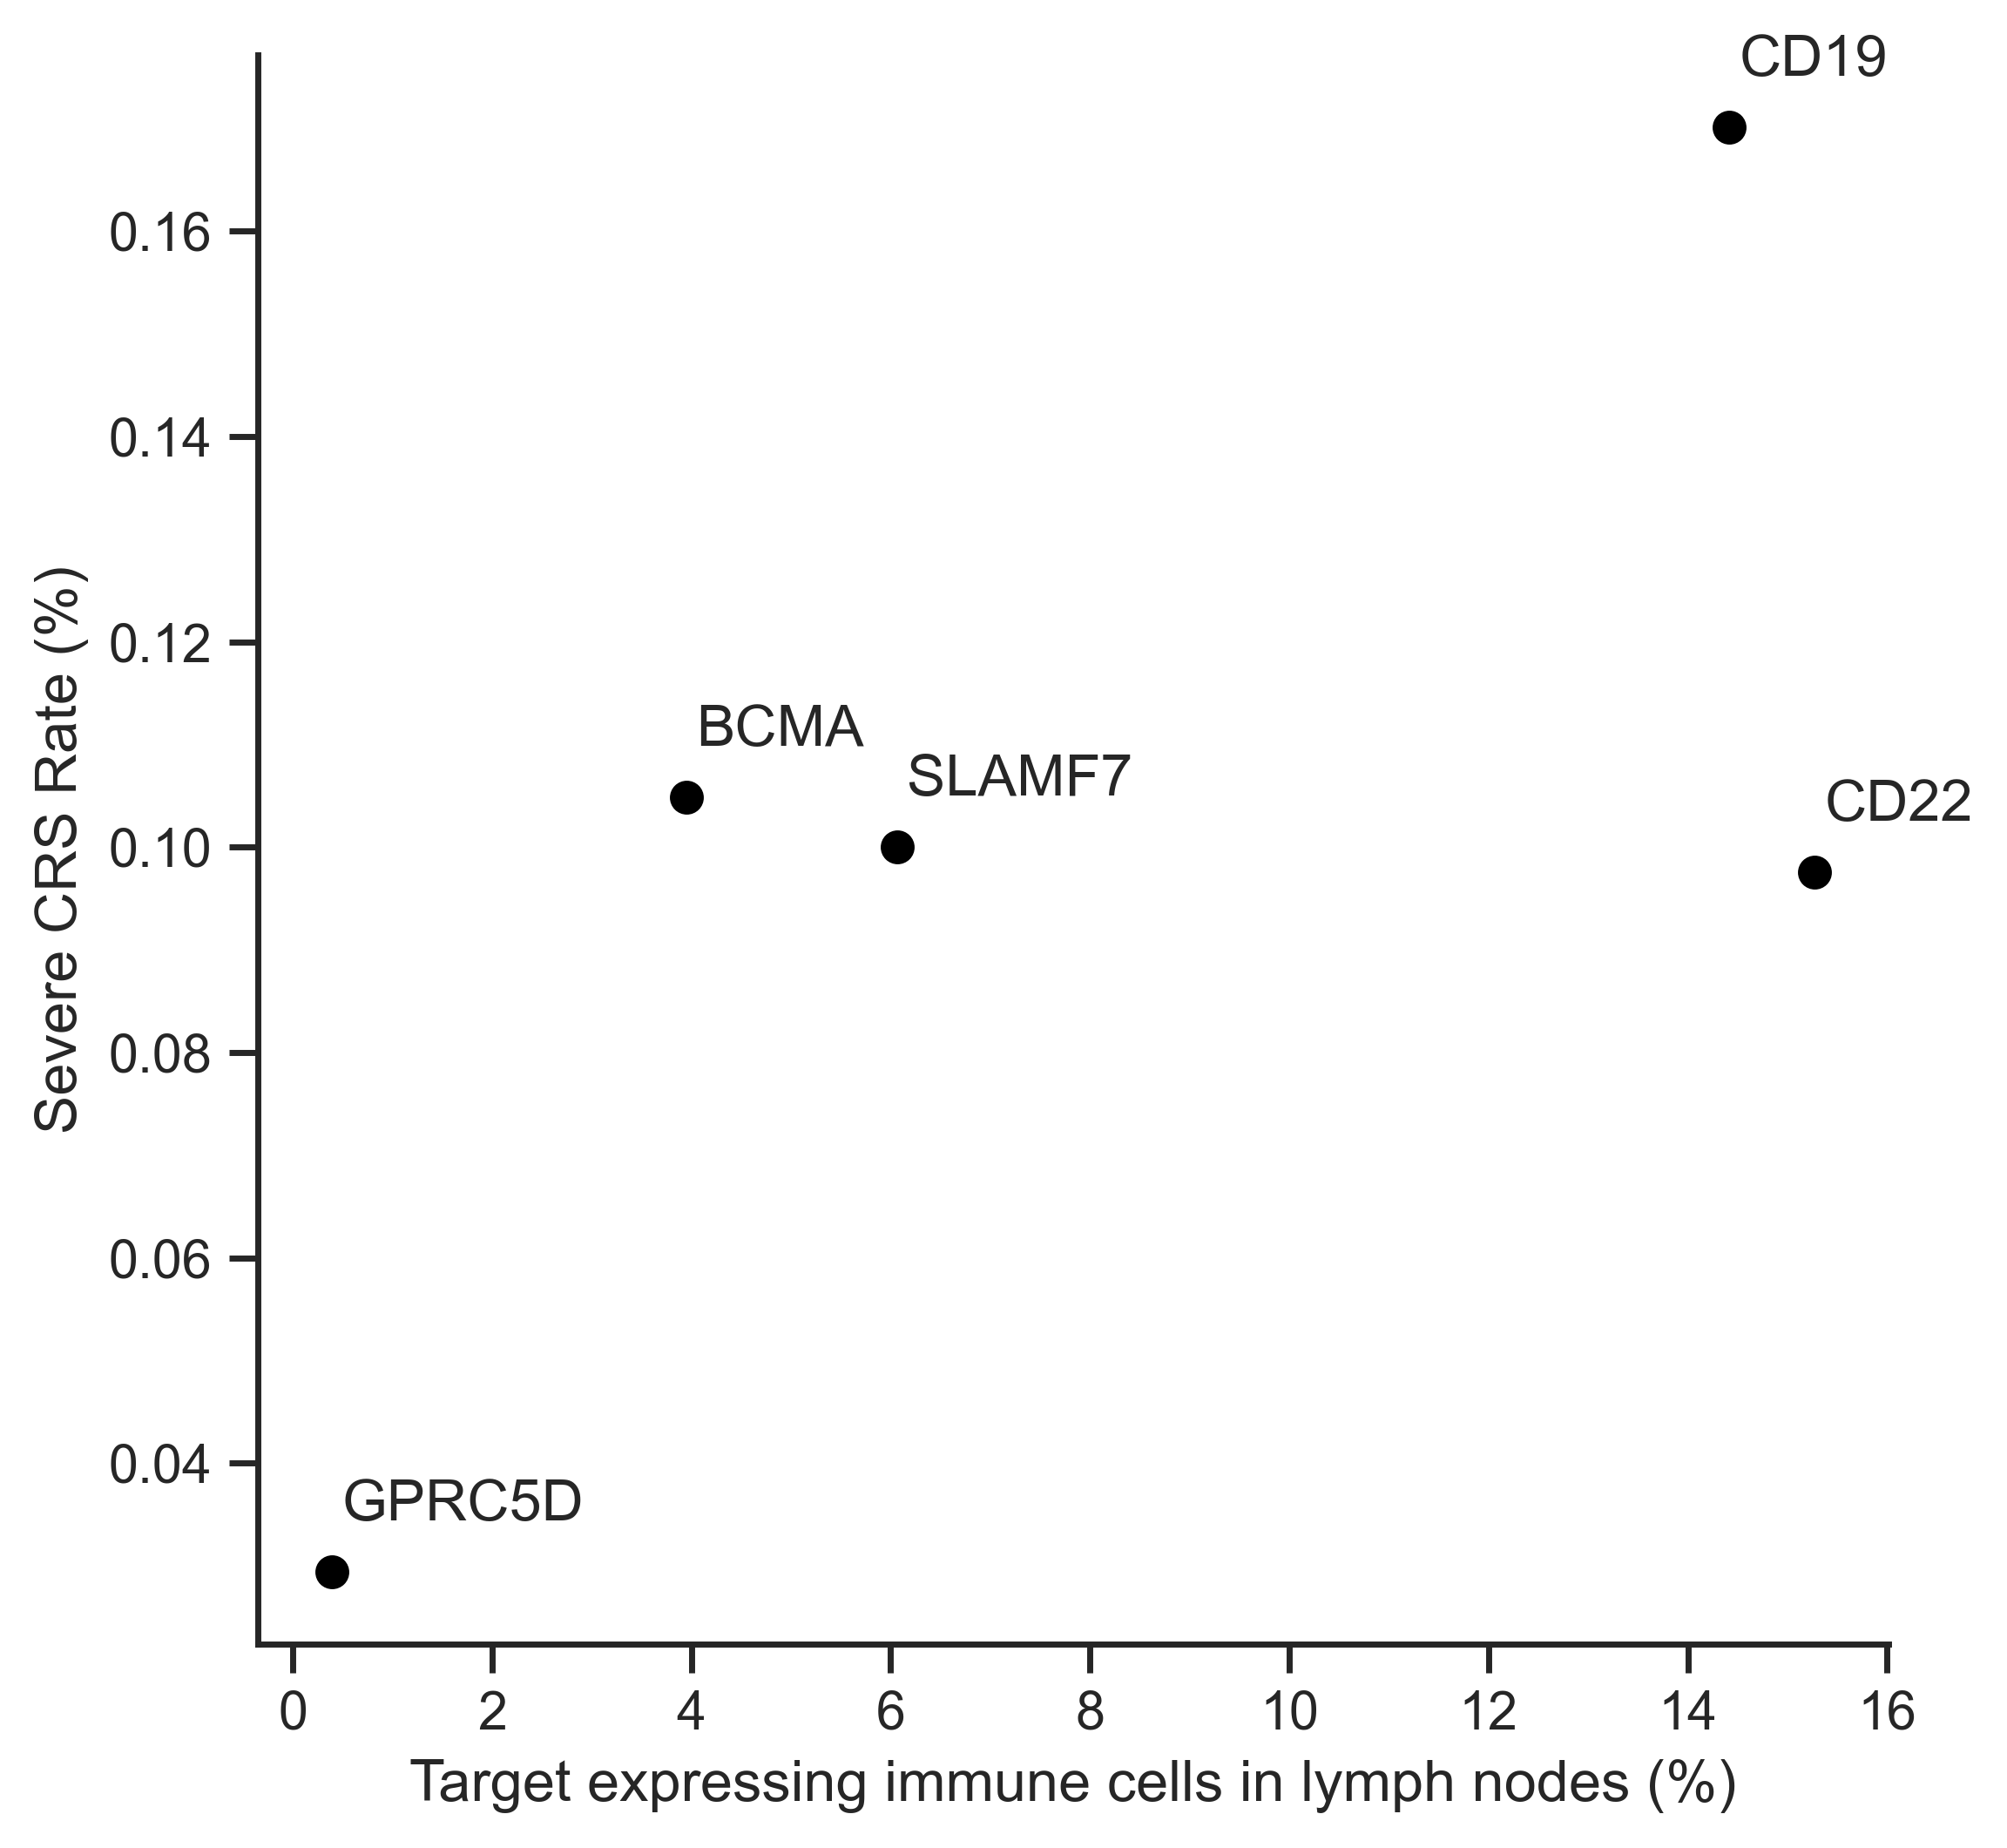

In [464]:
fig, ax = plt.subplots()
ax.scatter(df_plot['percentages'],df_plot['Severe CRS rate'], color='black')

for i, txt in enumerate(df_plot.index):
    ax.annotate(txt, (df_plot['percentages'][i]+0.1, df_plot['Severe CRS rate'][i]+0.005))

    
plt.ylabel('Severe CRS Rate (%)', size = 12)
plt.xlabel('Target expressing immune cells in lymph nodes (%)', size = 12)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [467]:
expr=df_plot['percentages']
expr

NCT Number
BCMA       3.948735
CD19      14.414029
CD22      15.269461
GPRC5D     0.392073
SLAMF7     6.063383
Name: percentages, dtype: float64

In [468]:
rate=df_plot['Severe CRS rate']
rate

NCT Number
BCMA      0.104891
CD19      0.170124
CD22      0.097549
GPRC5D    0.029412
SLAMF7    0.100000
Name: Severe CRS rate, dtype: float64

In [469]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(expr.values, rate.values)

/var/folders/fj/5ywcjg851092_gqm88cq4t3dt4qvjk/T/ipykernel_45535/4100377638.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.7262314862168625, pvalue=0.1647089627604543)

In [470]:
from scipy import stats
res = stats.spearmanr(expr.values, rate.values)
print(res.statistic)
print(res.pvalue)

0.3
0.6238376647810728
